In [85]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, recall_score, precision_score, f1_score

In [3]:
df = pd.read_csv('winequality-white.csv', sep=";")

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
df.shape

(4898, 12)

# EDA

##Correlation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
corr = df.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

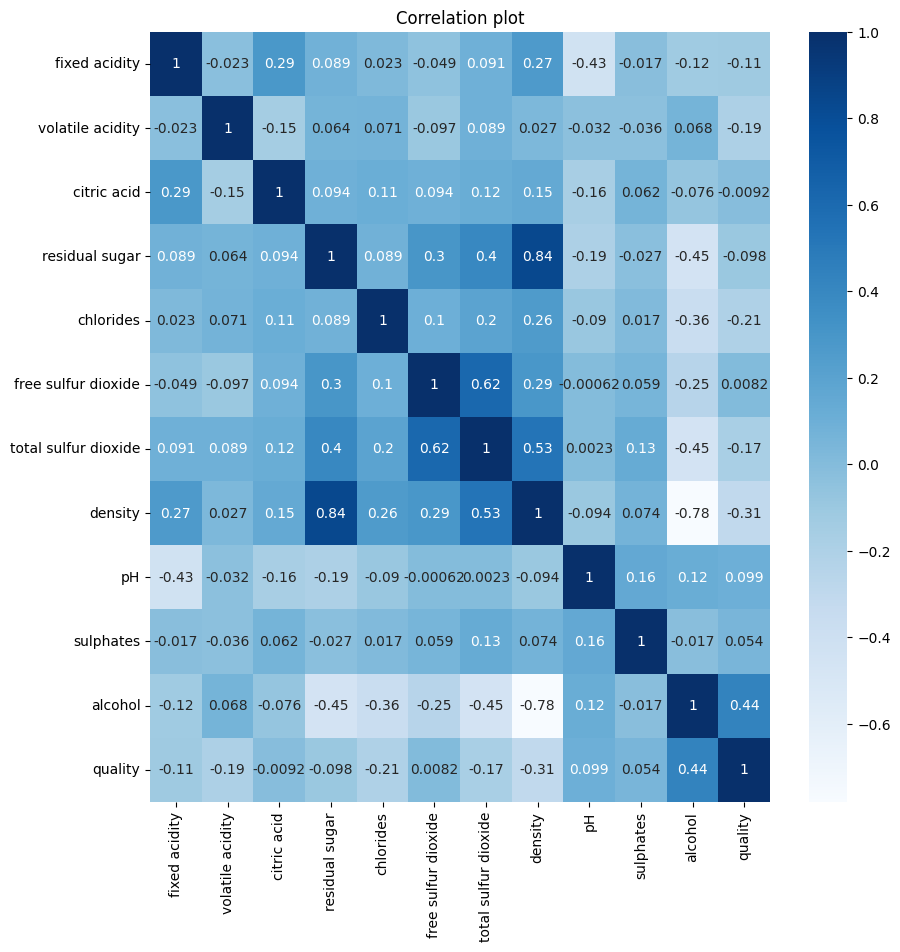

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation plot')
plt.show()

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Data Distribution plots

In [56]:
import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#095859"])

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

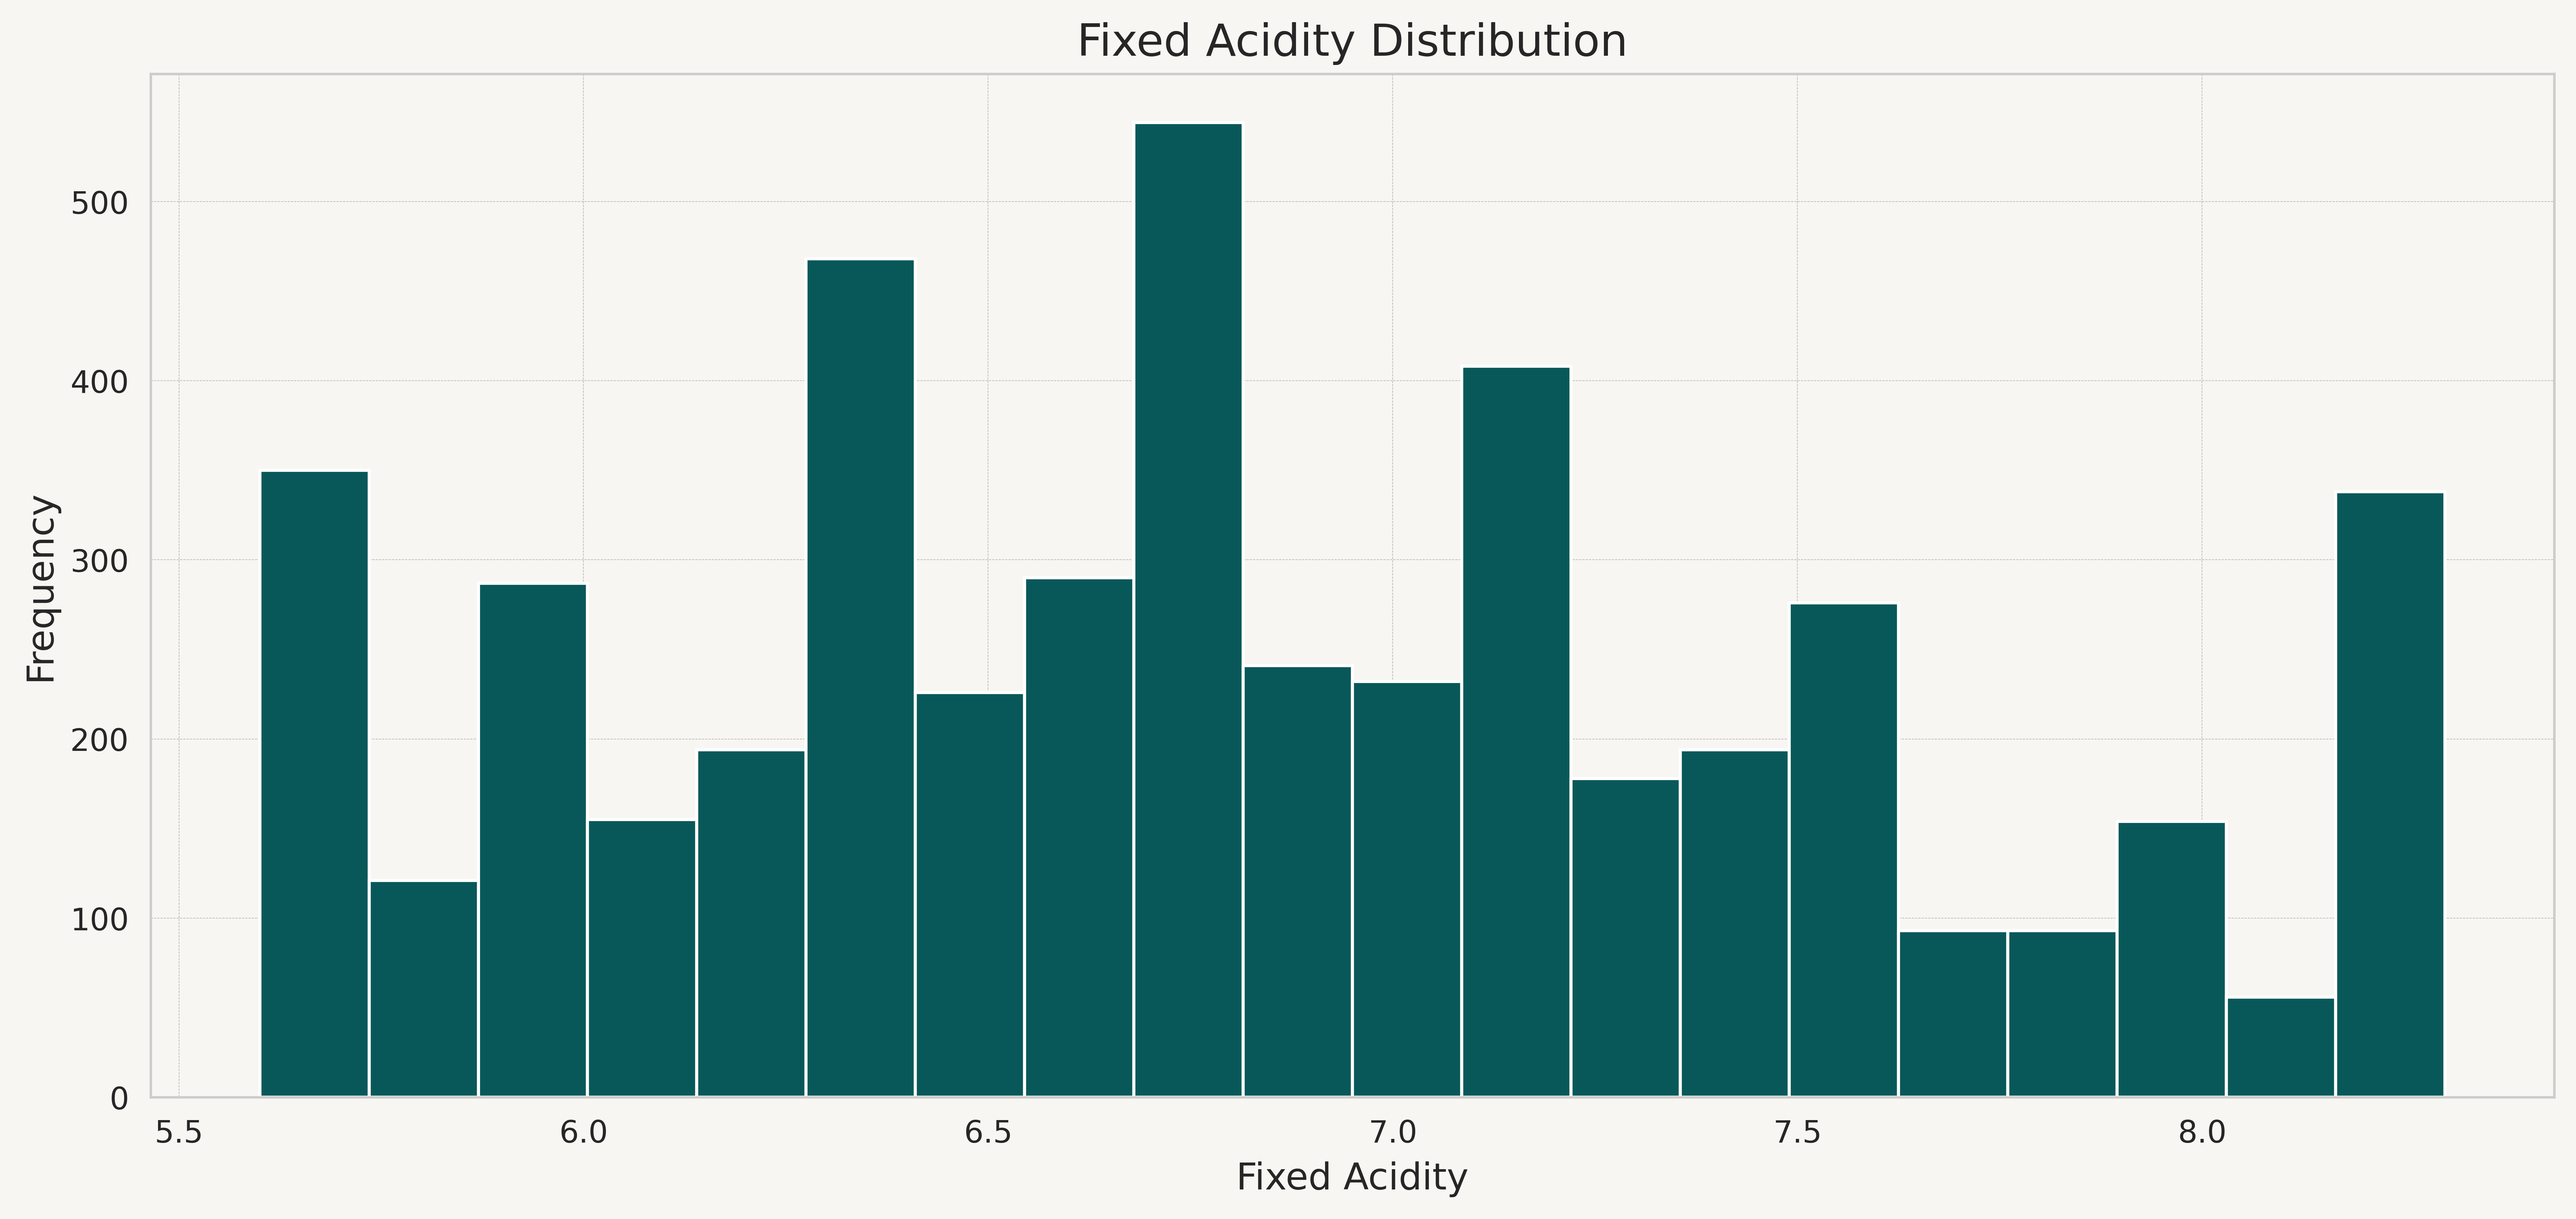

In [59]:
df['fixed acidity'].hist(bins=20)
plt.title('Fixed Acidity Distribution')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

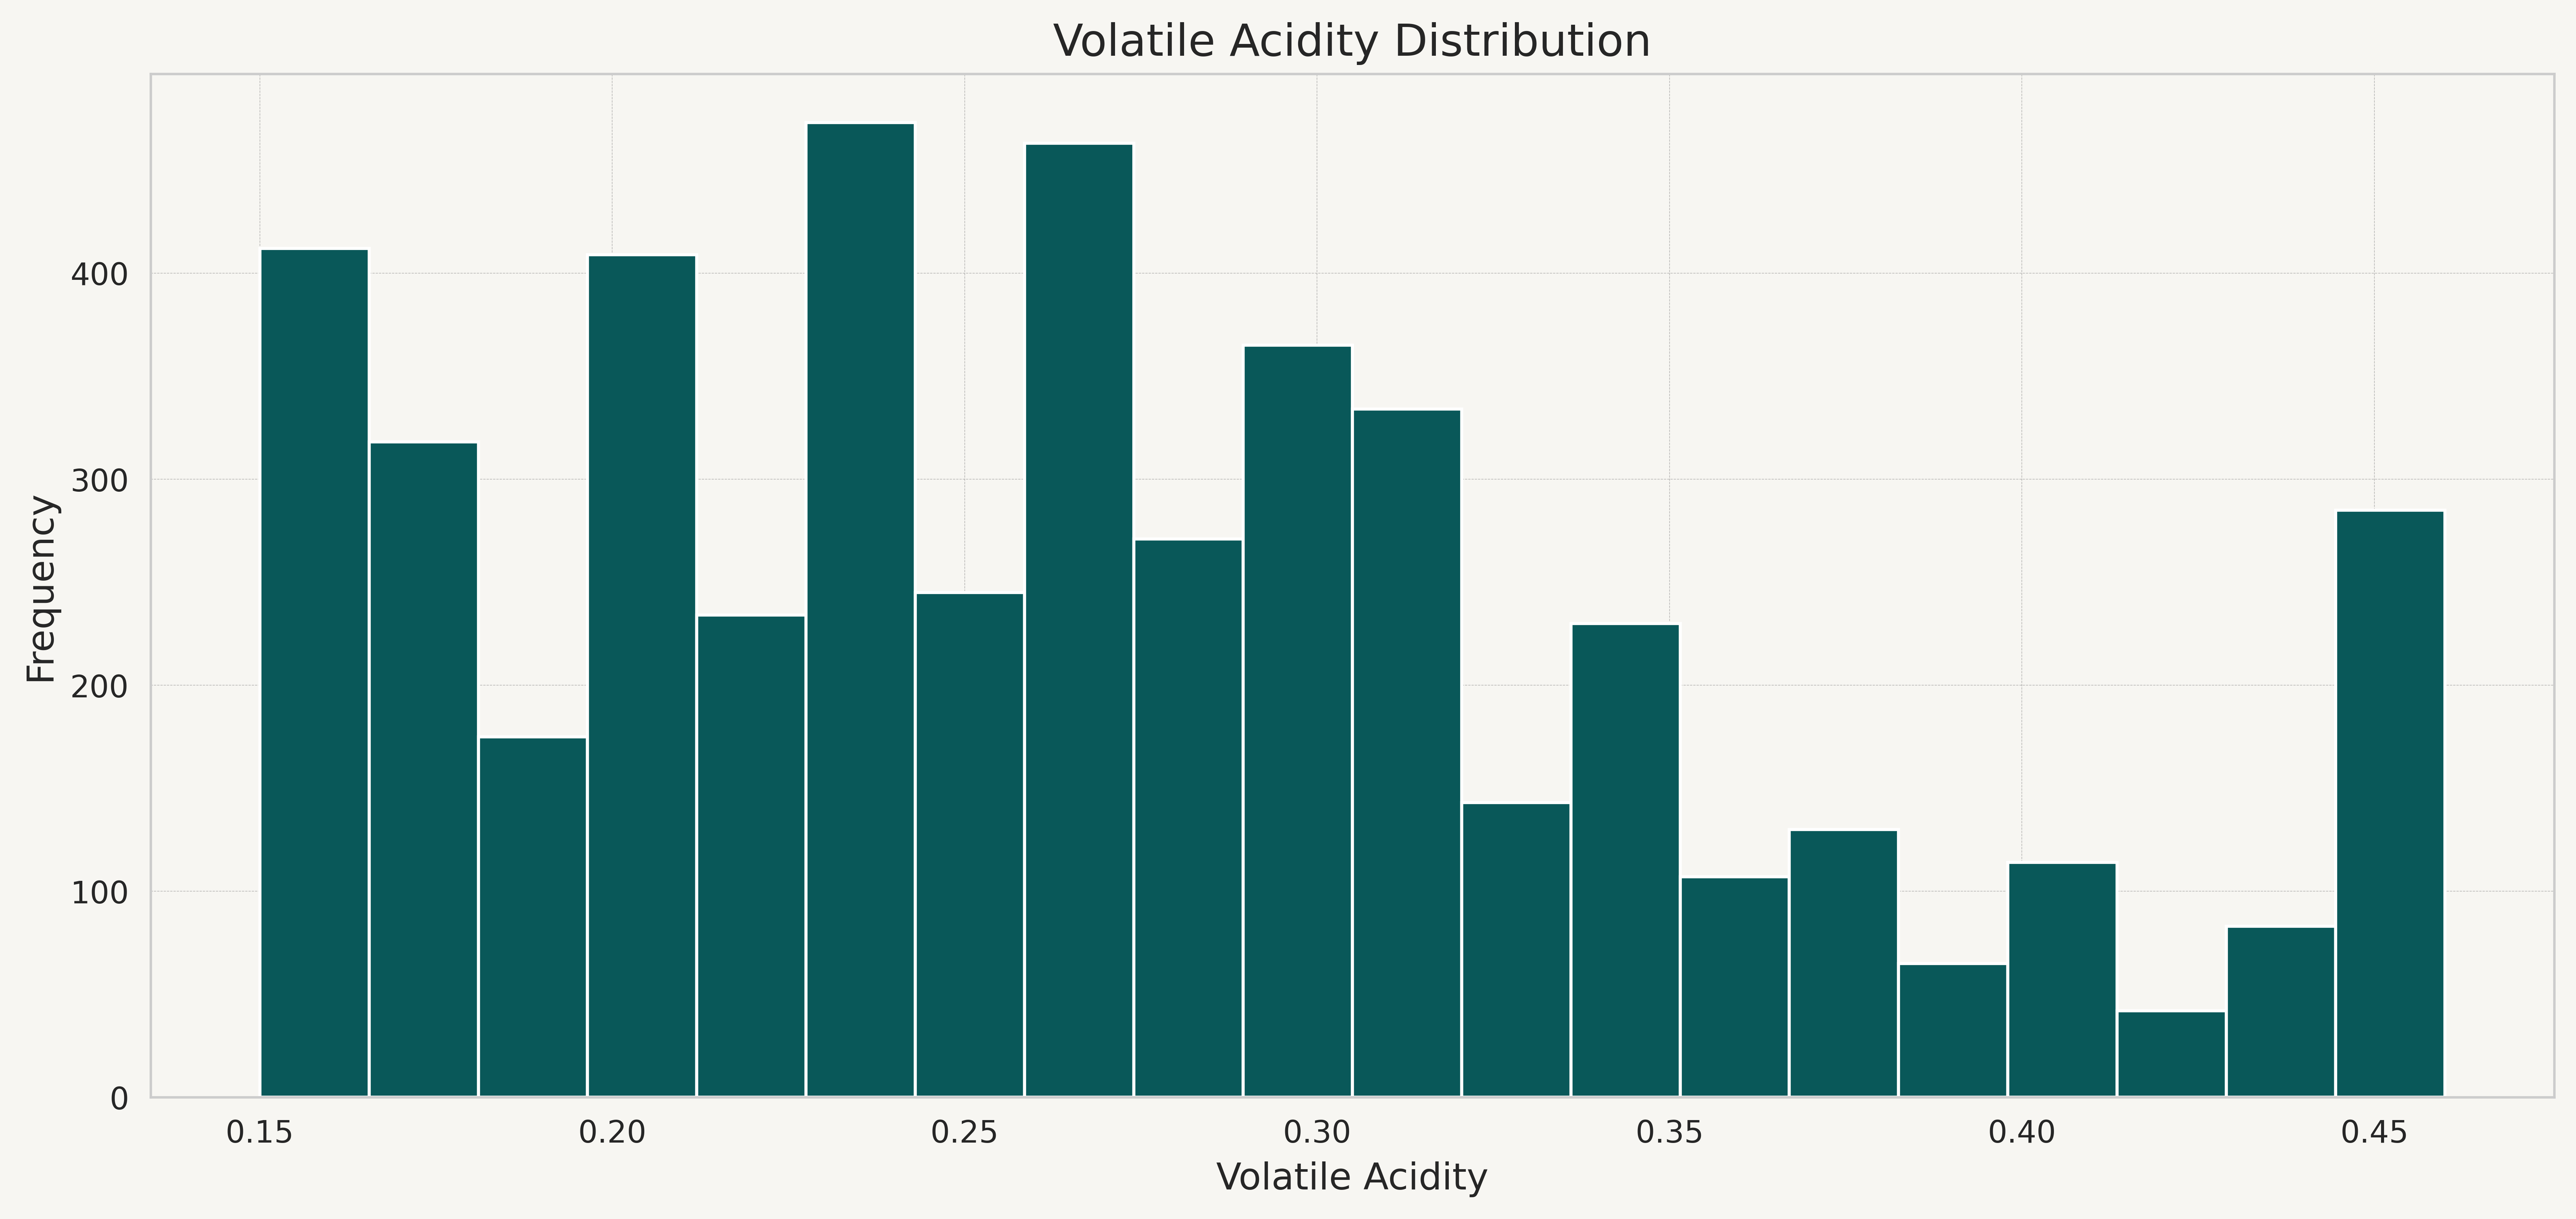

In [60]:
df['volatile acidity'].hist(bins=20)
plt.title('Volatile Acidity Distribution')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

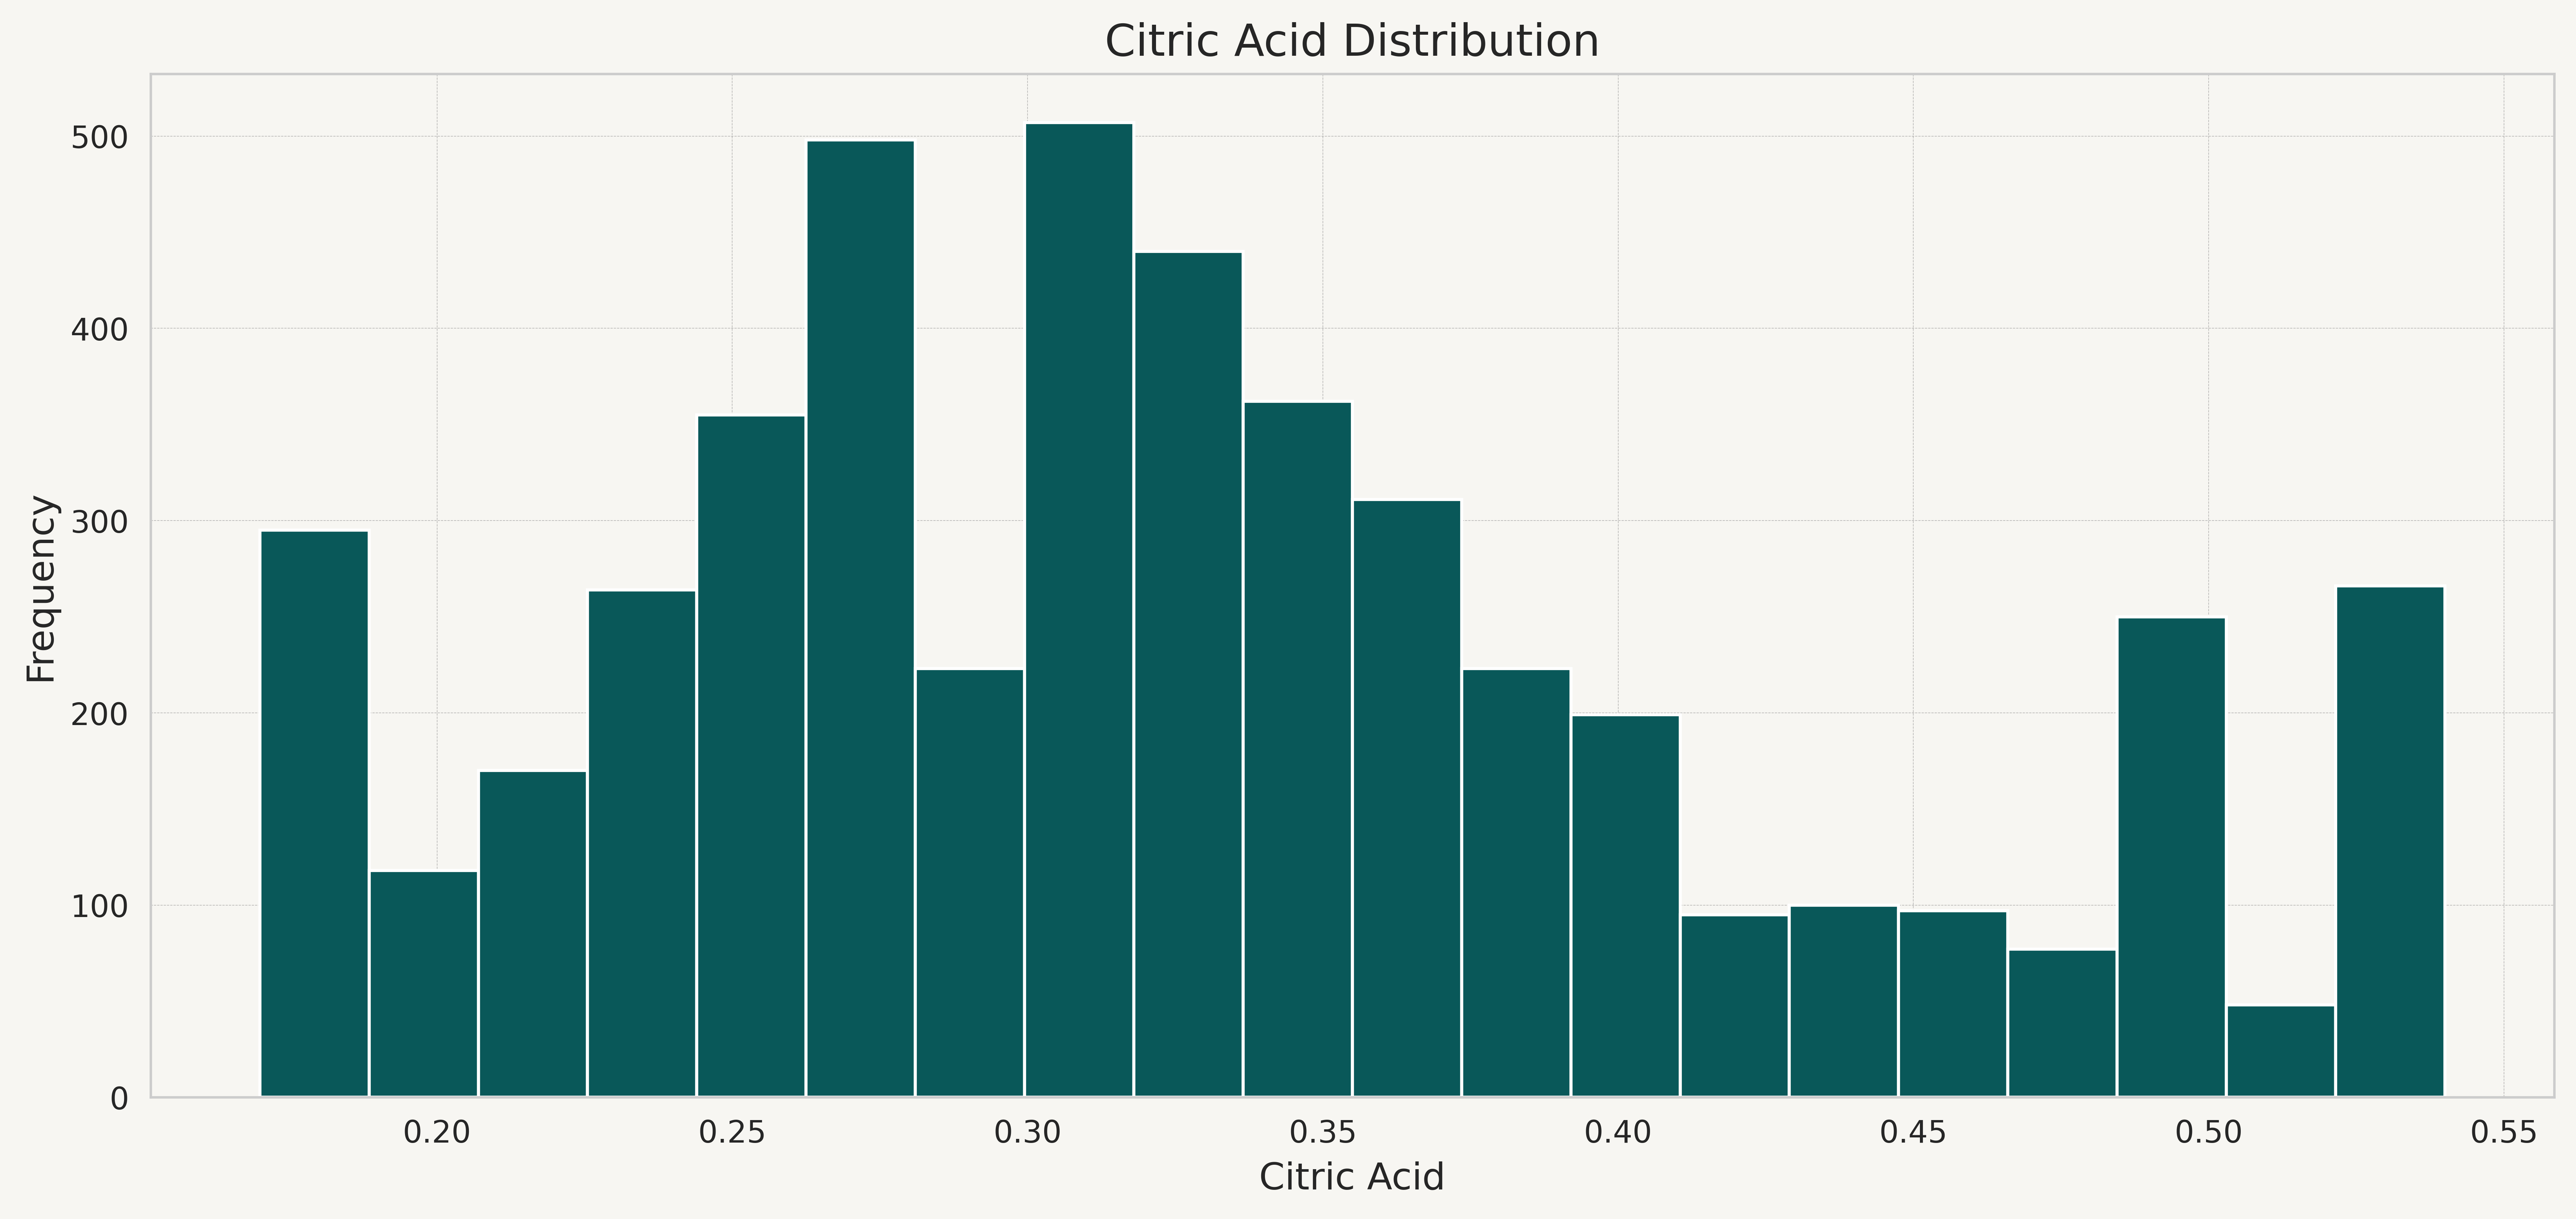

In [61]:
df['citric acid'].hist(bins=20)
plt.title('Citric Acid Distribution')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

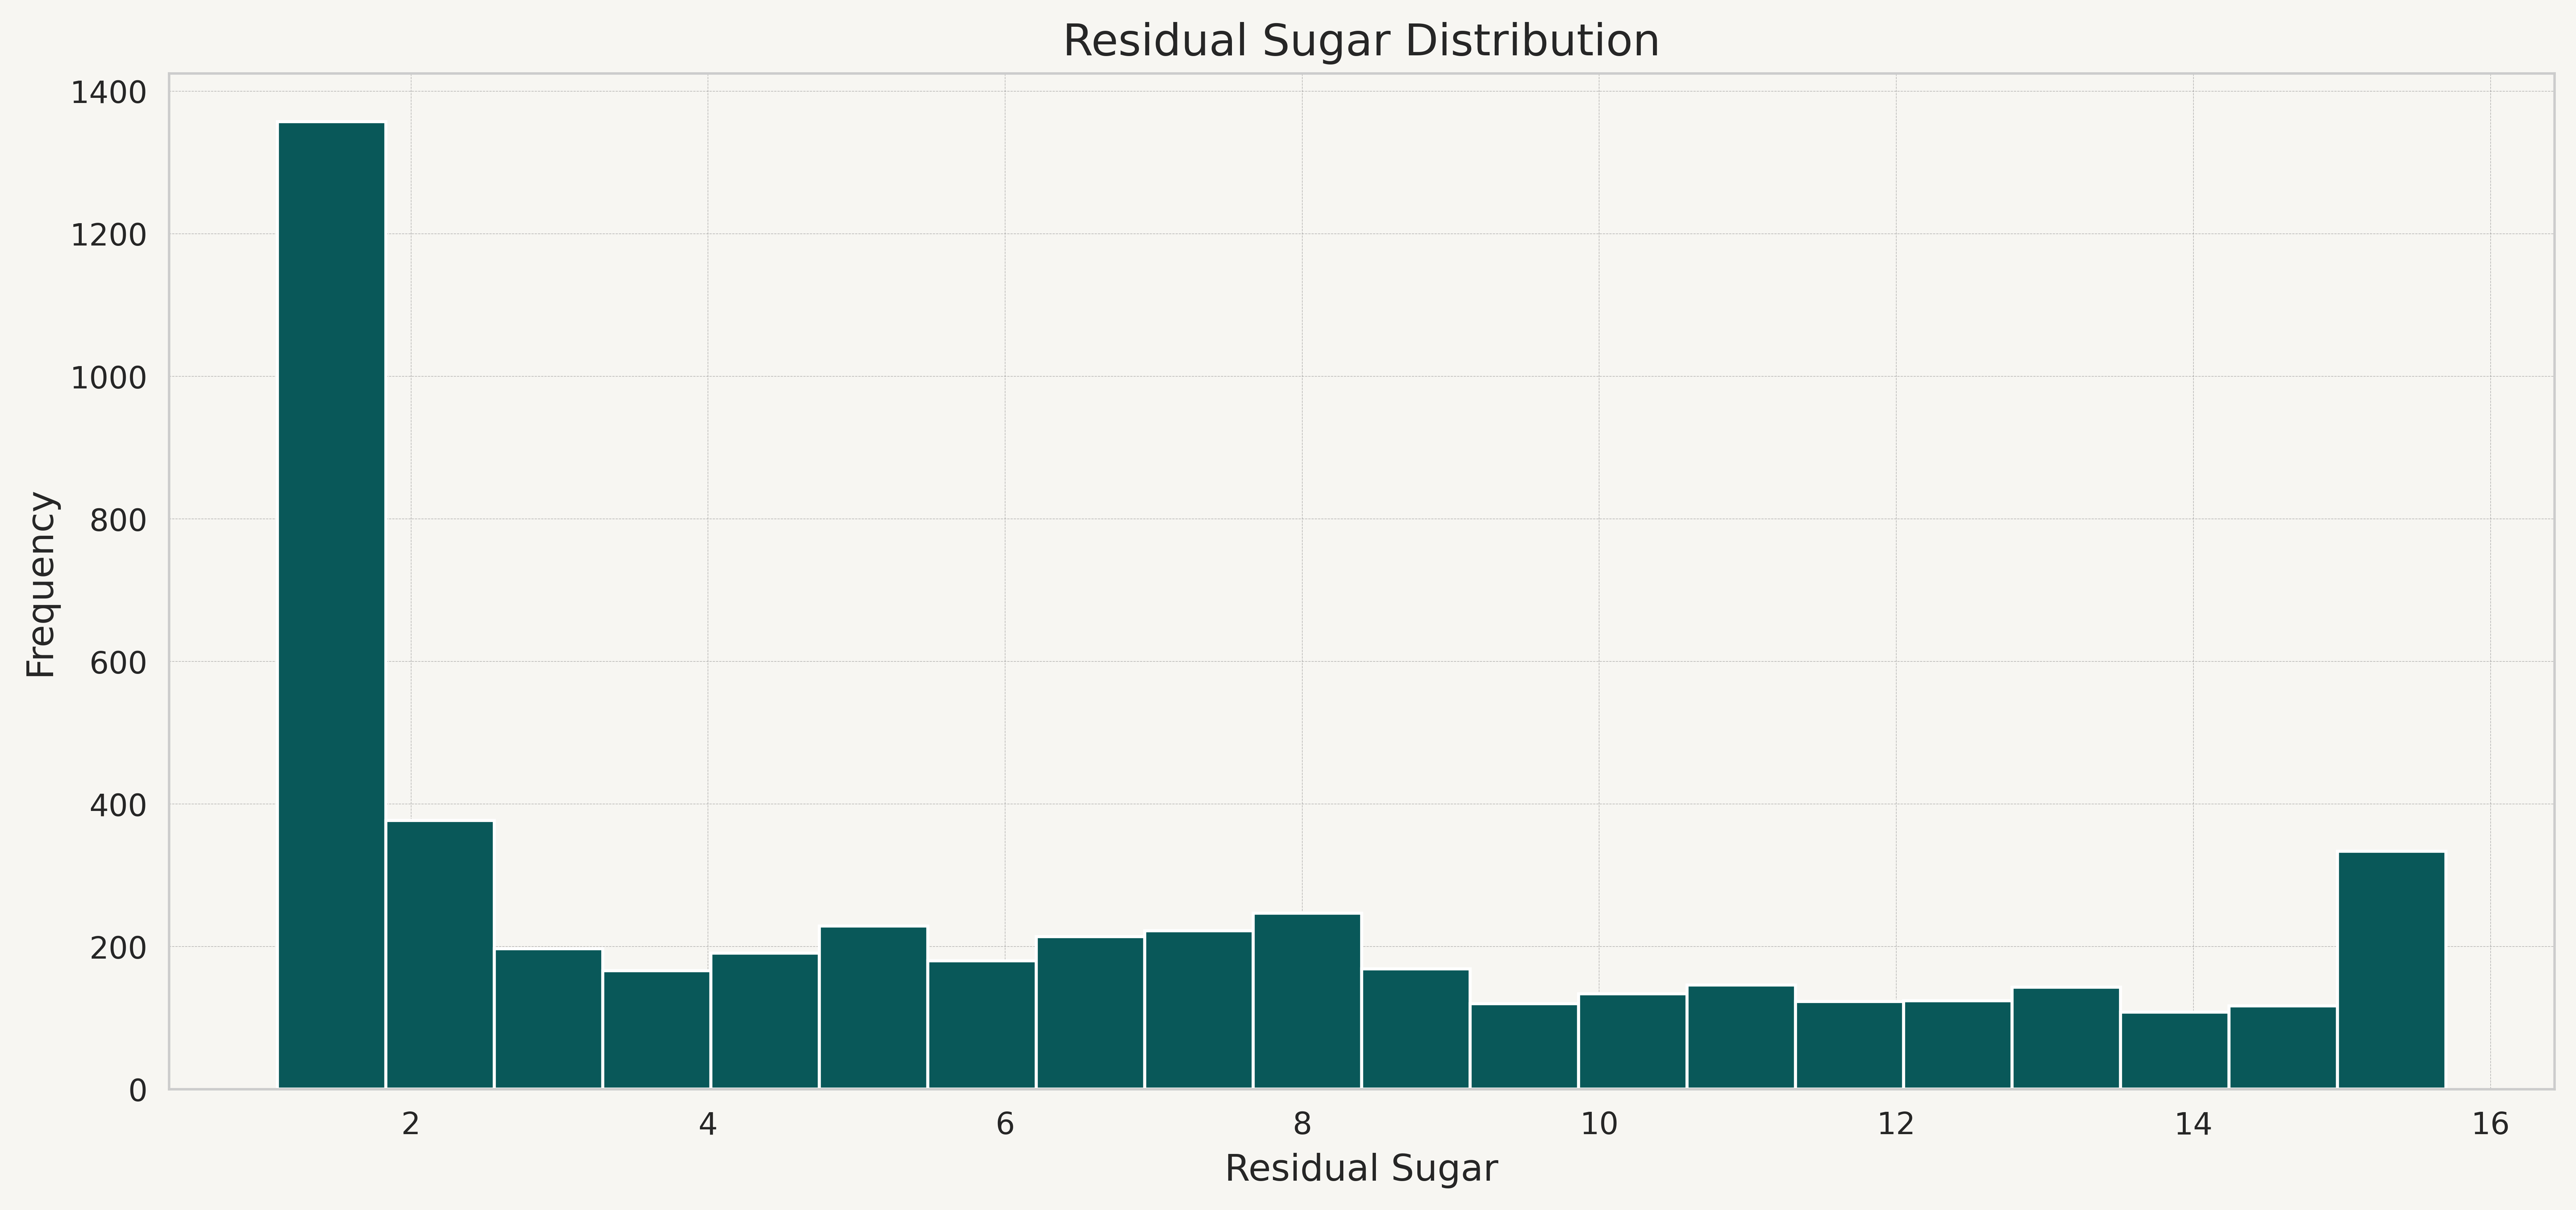

In [62]:
df['residual sugar'].hist(bins=20)
plt.title('Residual Sugar Distribution')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

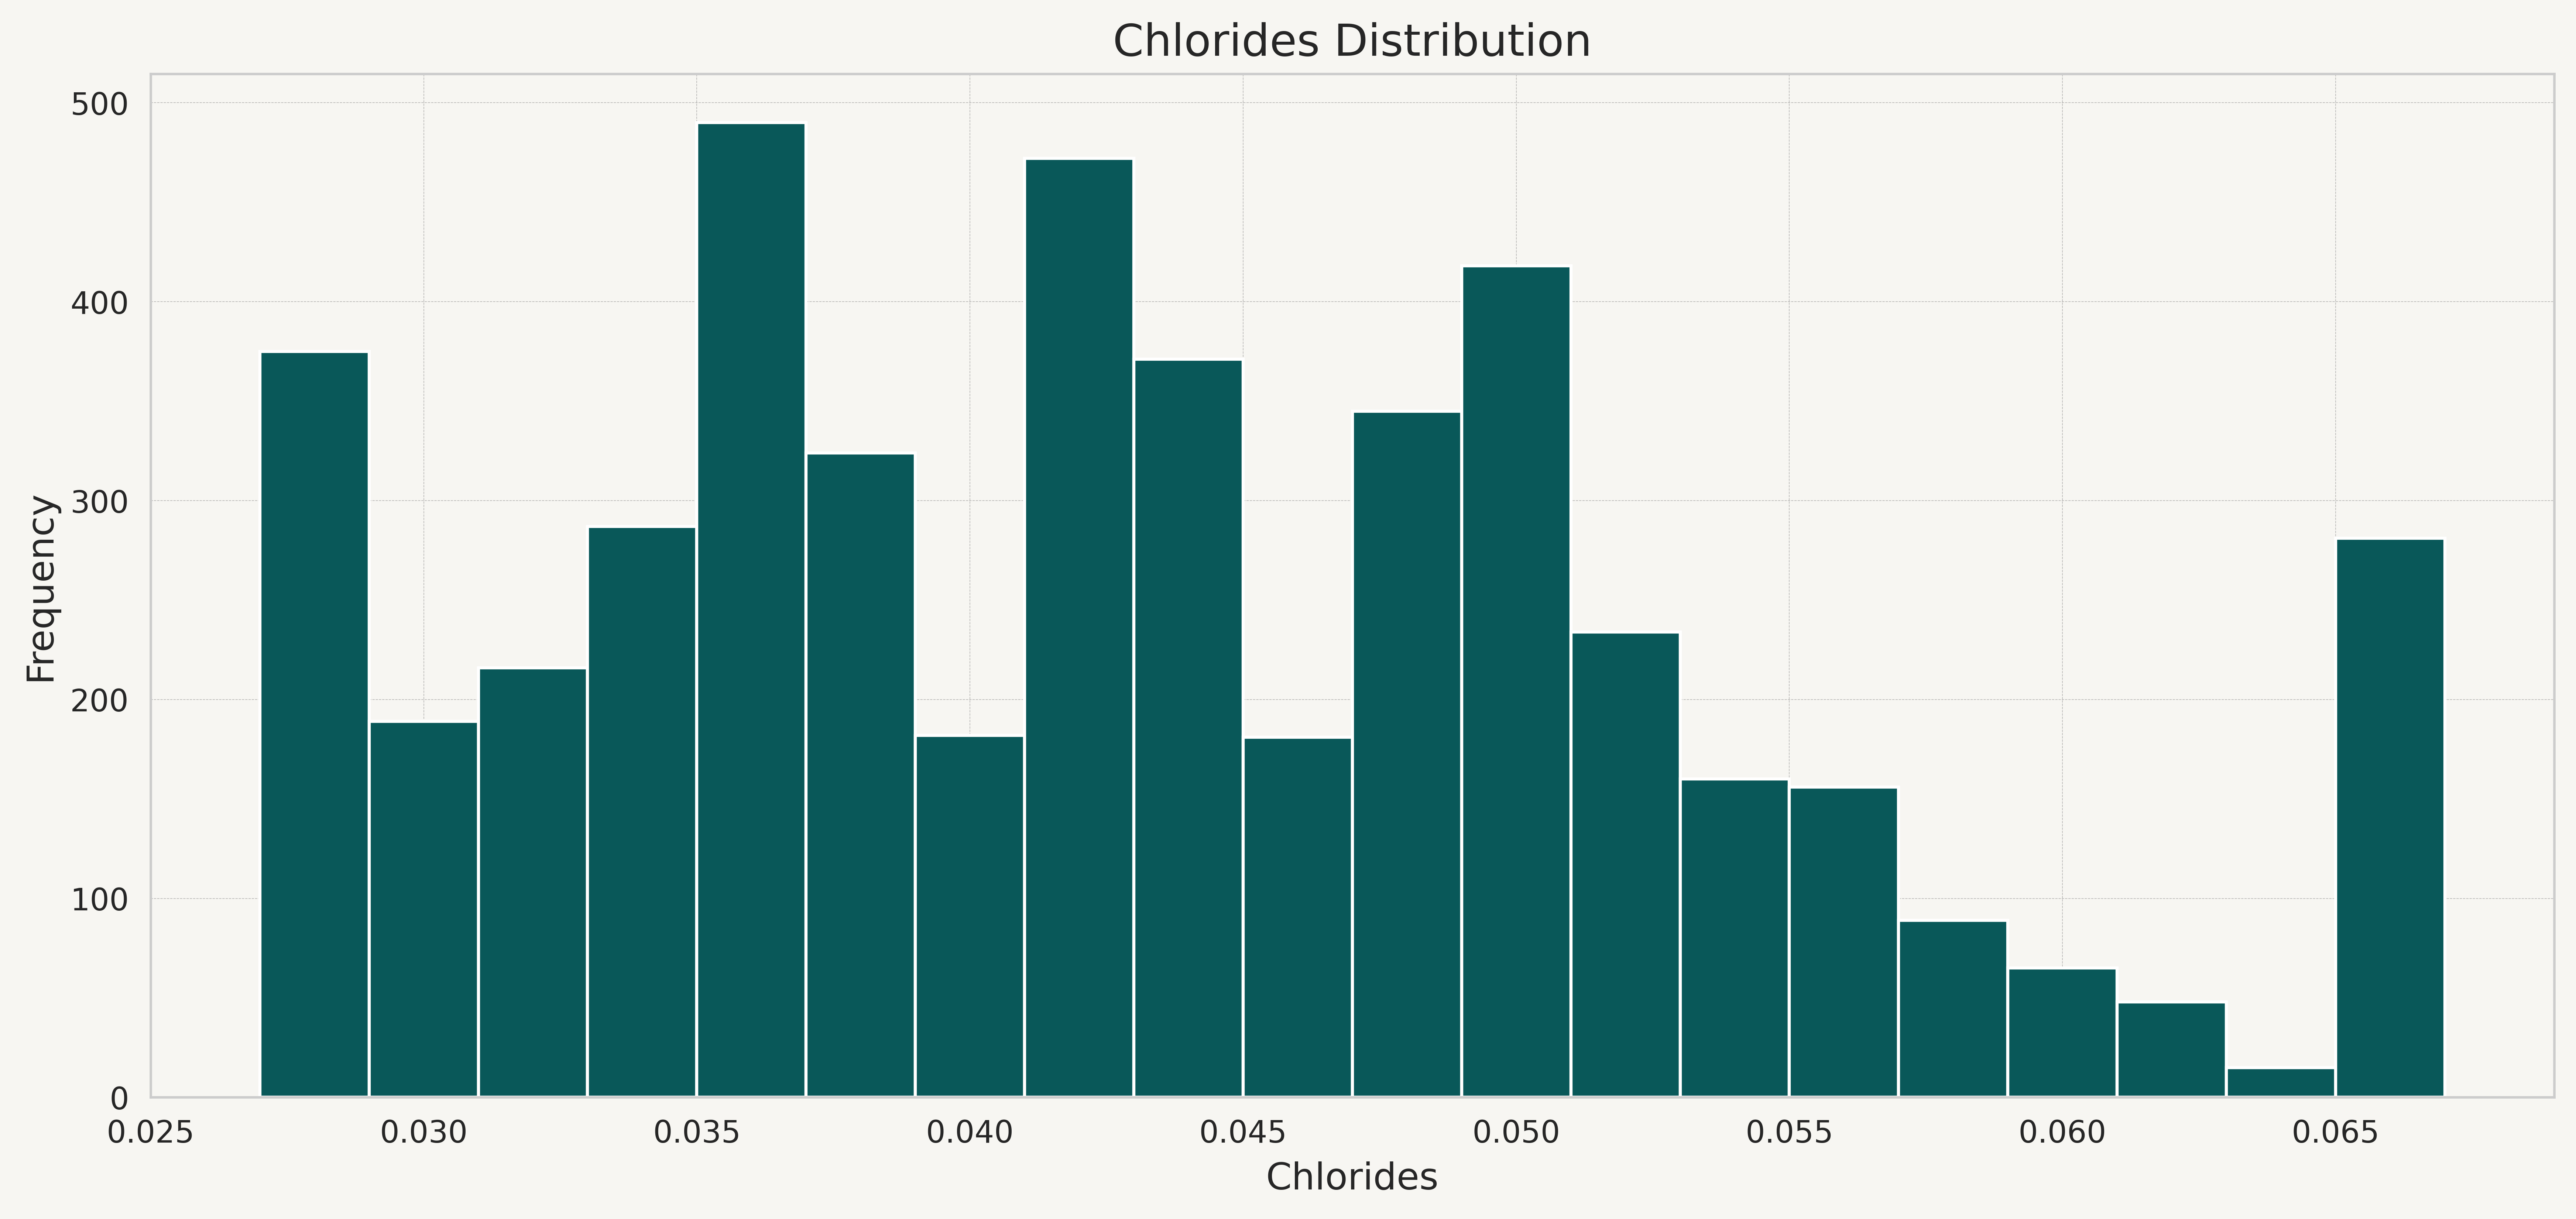

In [63]:
df['chlorides'].hist(bins=20)
plt.title('Chlorides Distribution')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()

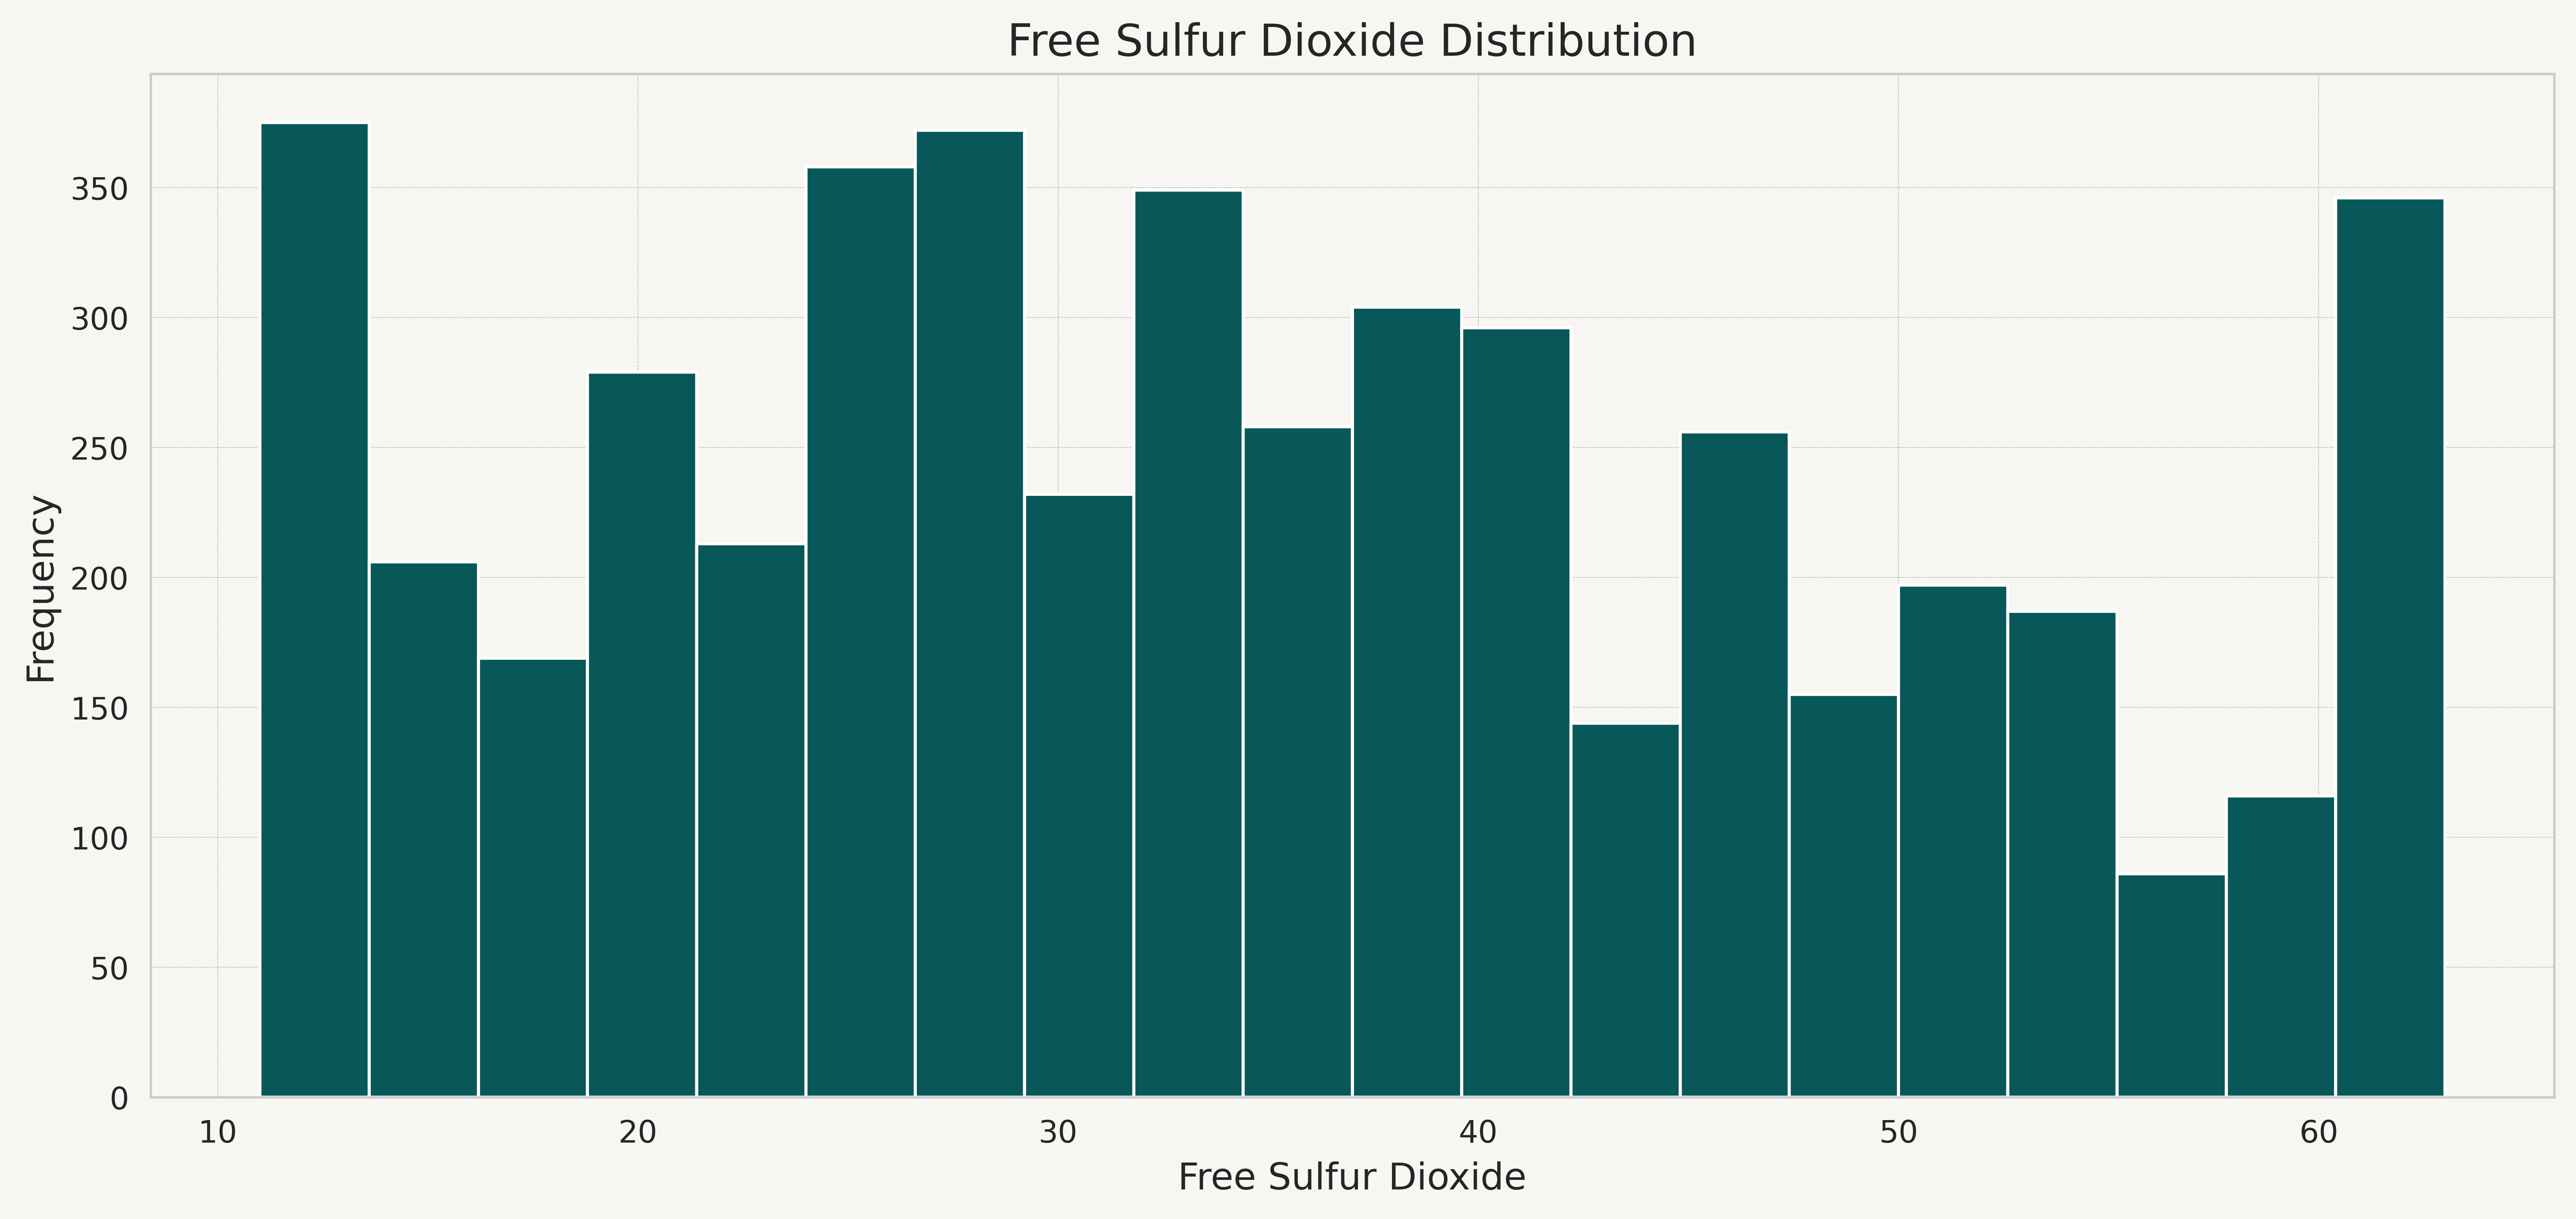

In [64]:
df['free sulfur dioxide'].hist(bins=20)
plt.title('Free Sulfur Dioxide Distribution')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

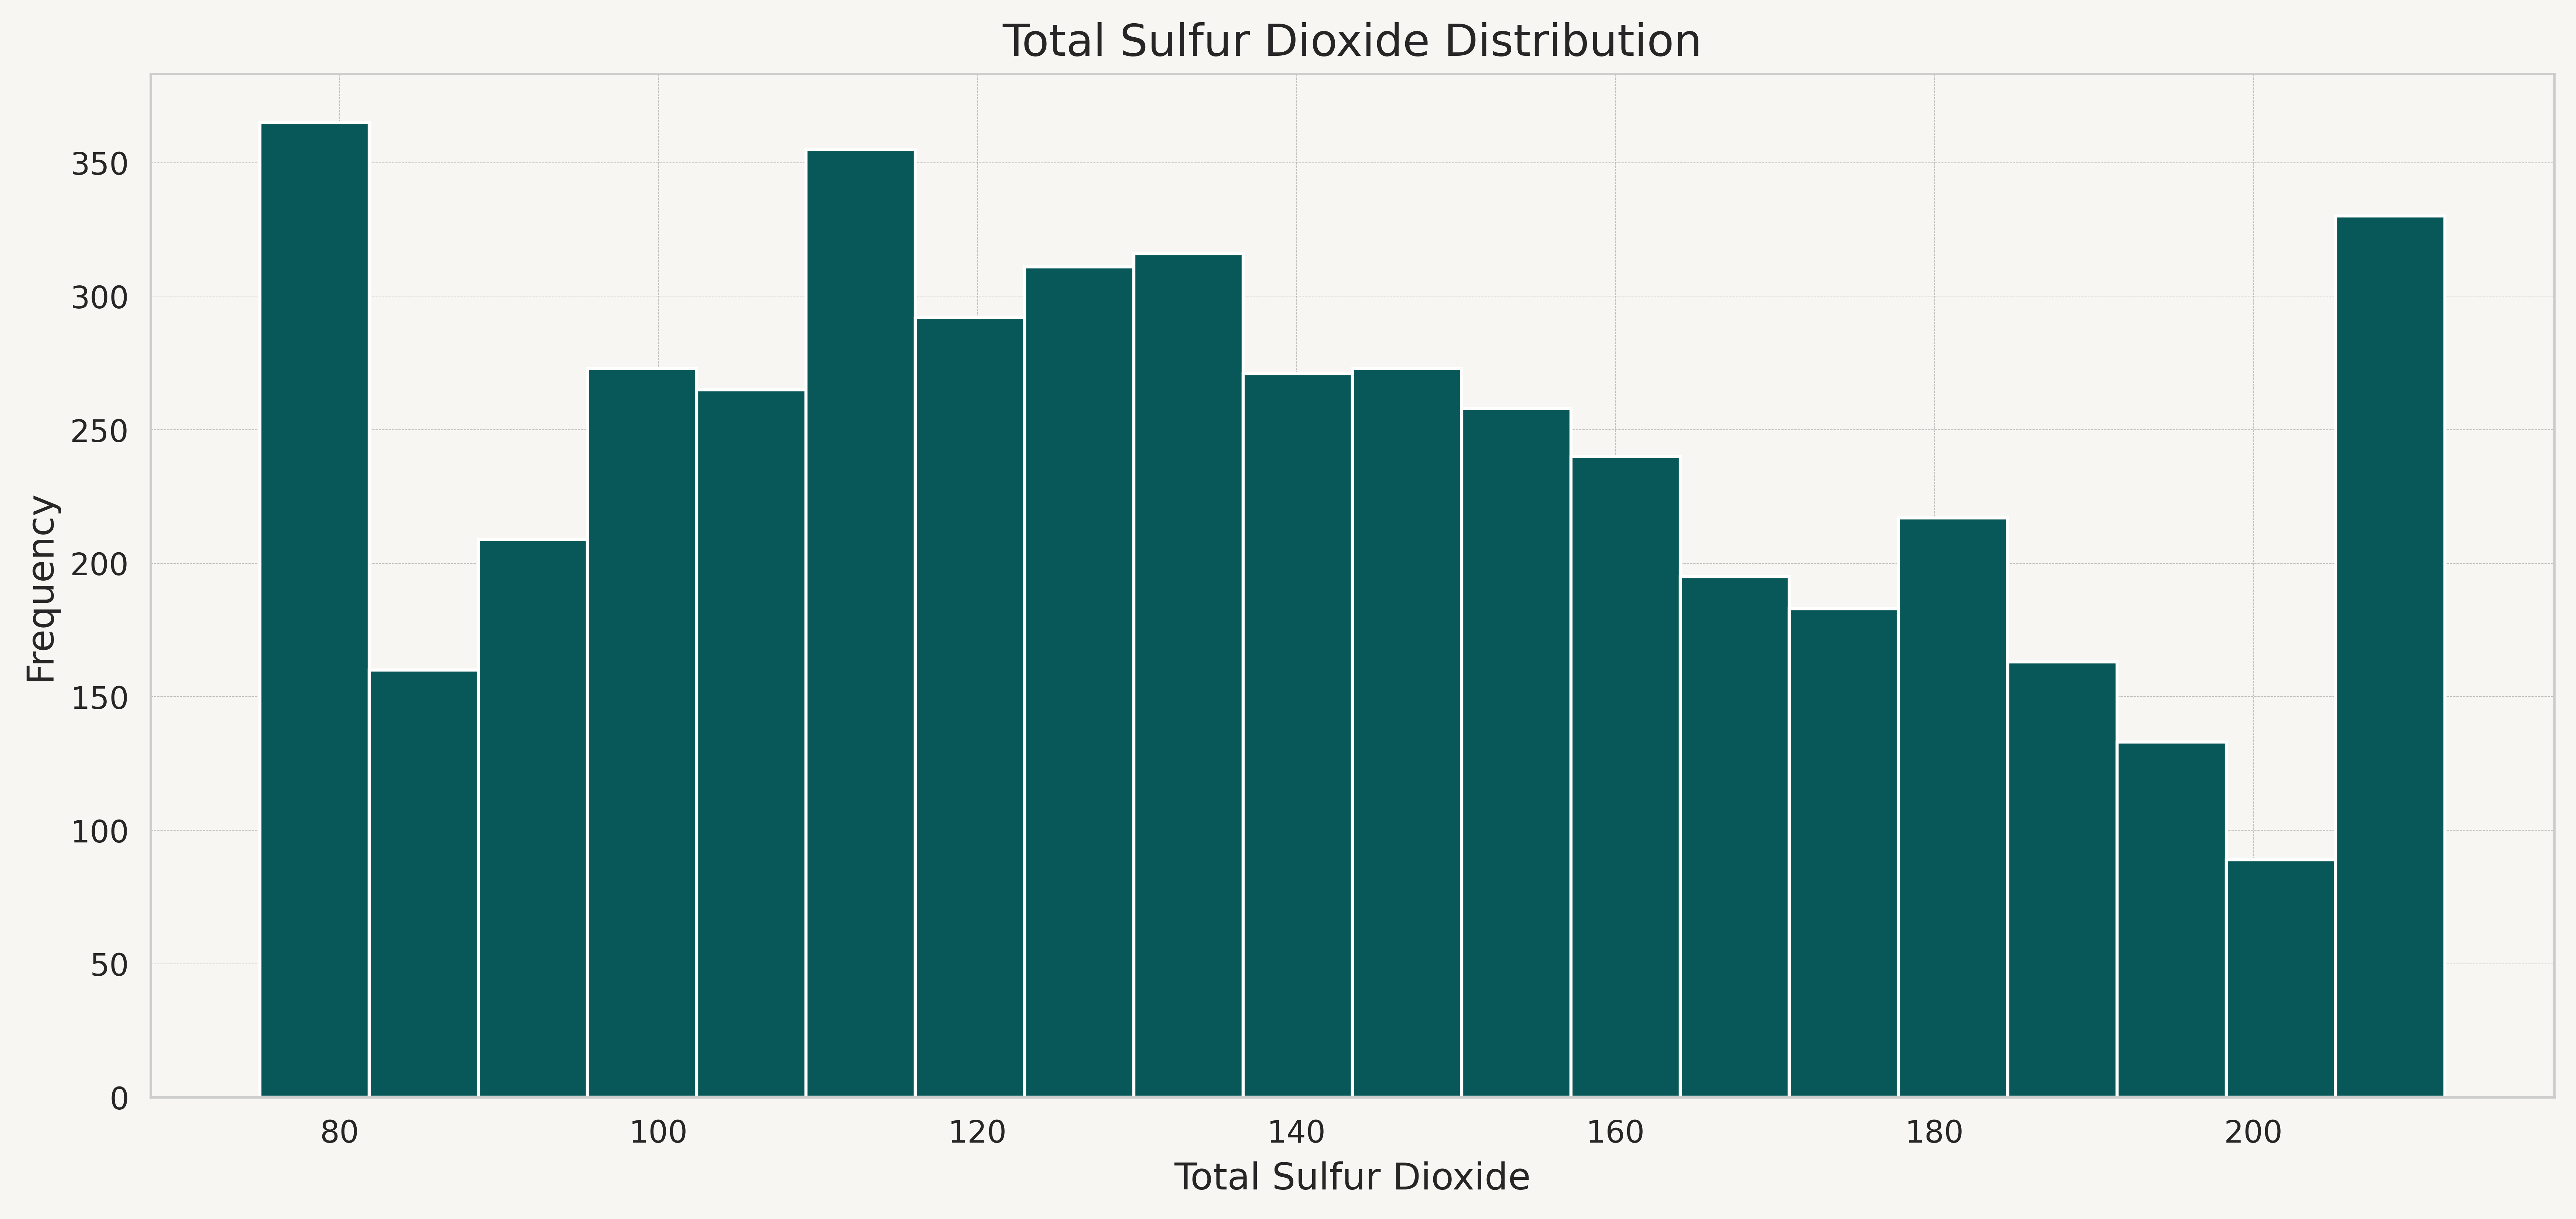

In [65]:
df['total sulfur dioxide'].hist(bins=20)
plt.title('Total Sulfur Dioxide Distribution')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

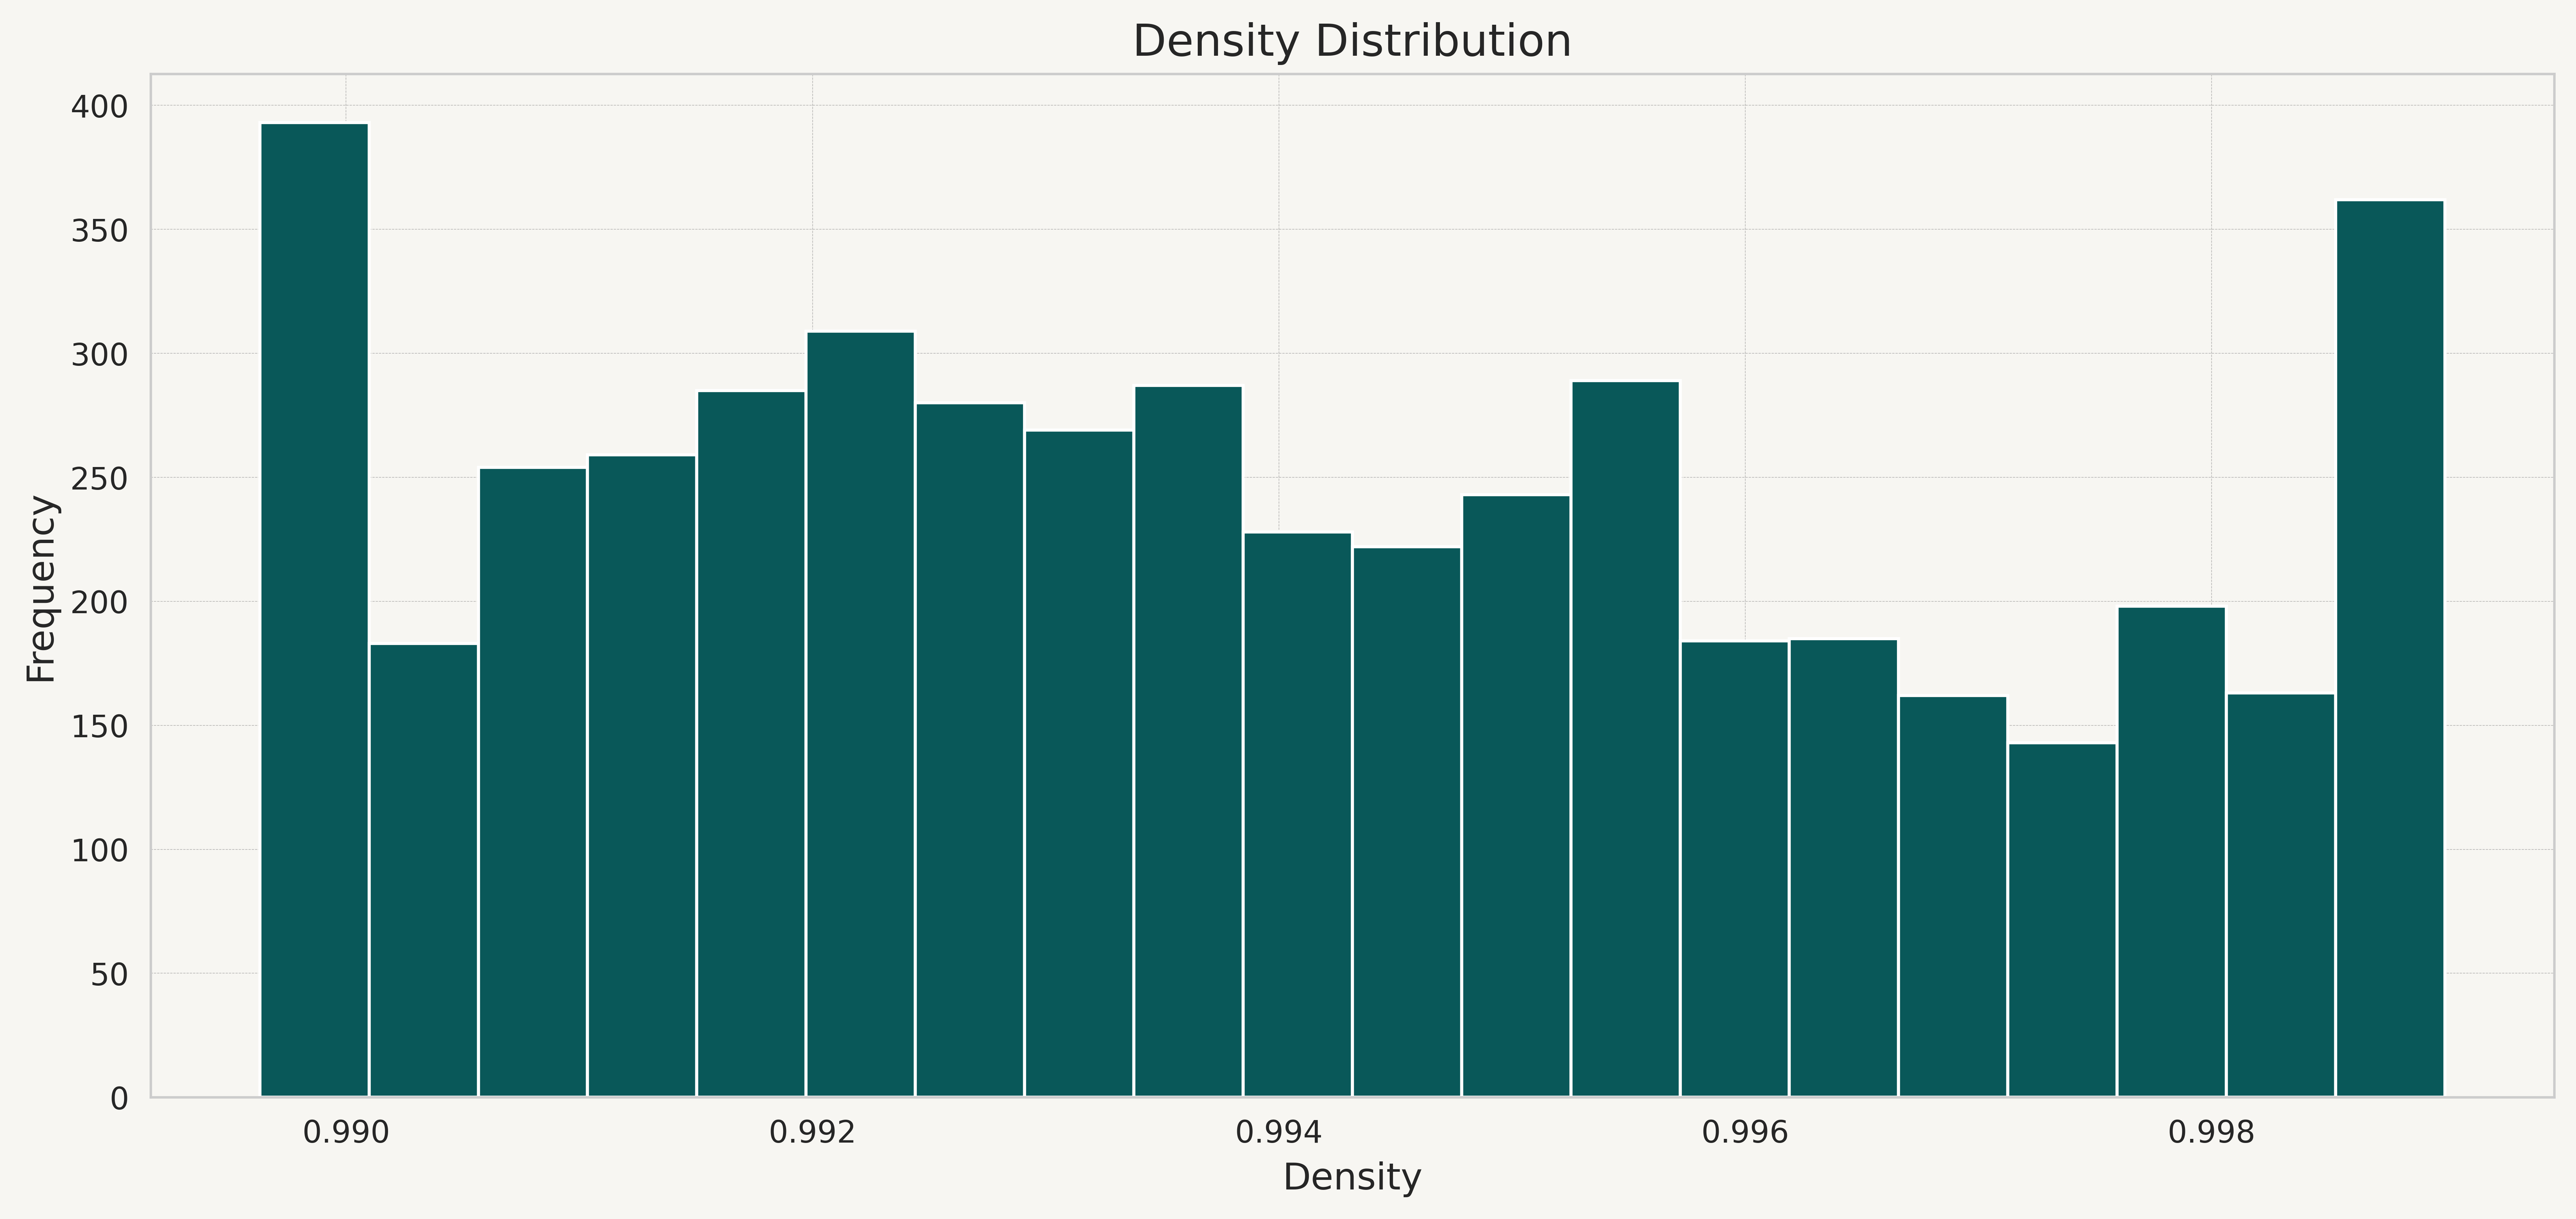

In [66]:
df['density'].hist(bins=20)
plt.title('Density Distribution')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

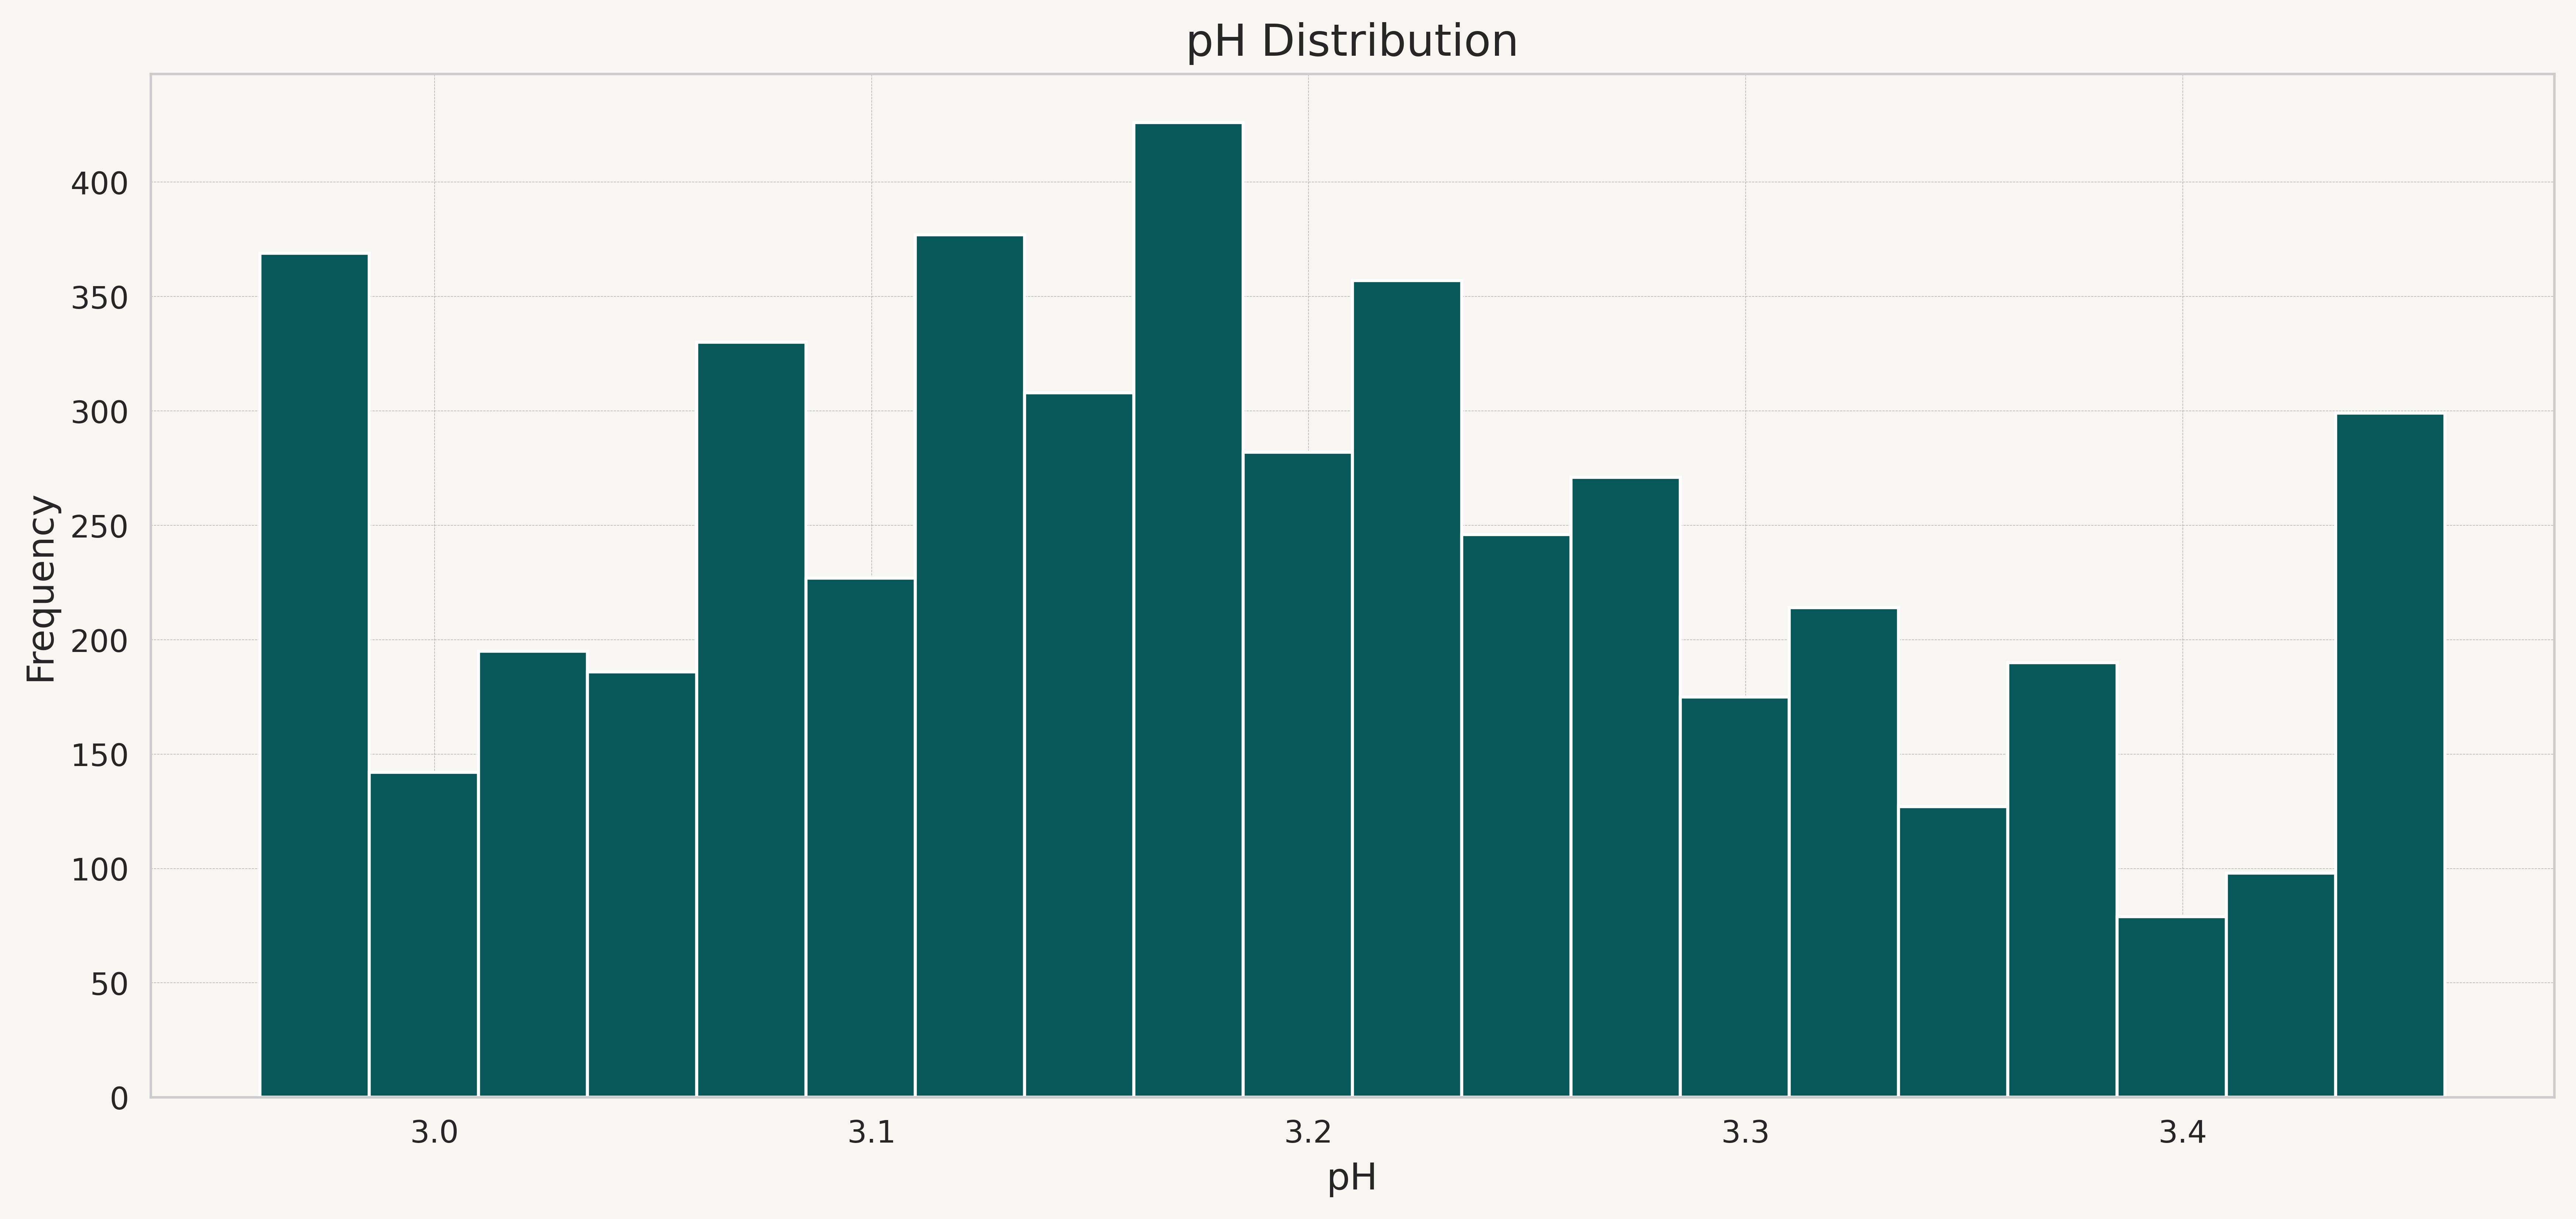

In [67]:
df['pH'].hist(bins=20)
plt.title('pH Distribution')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

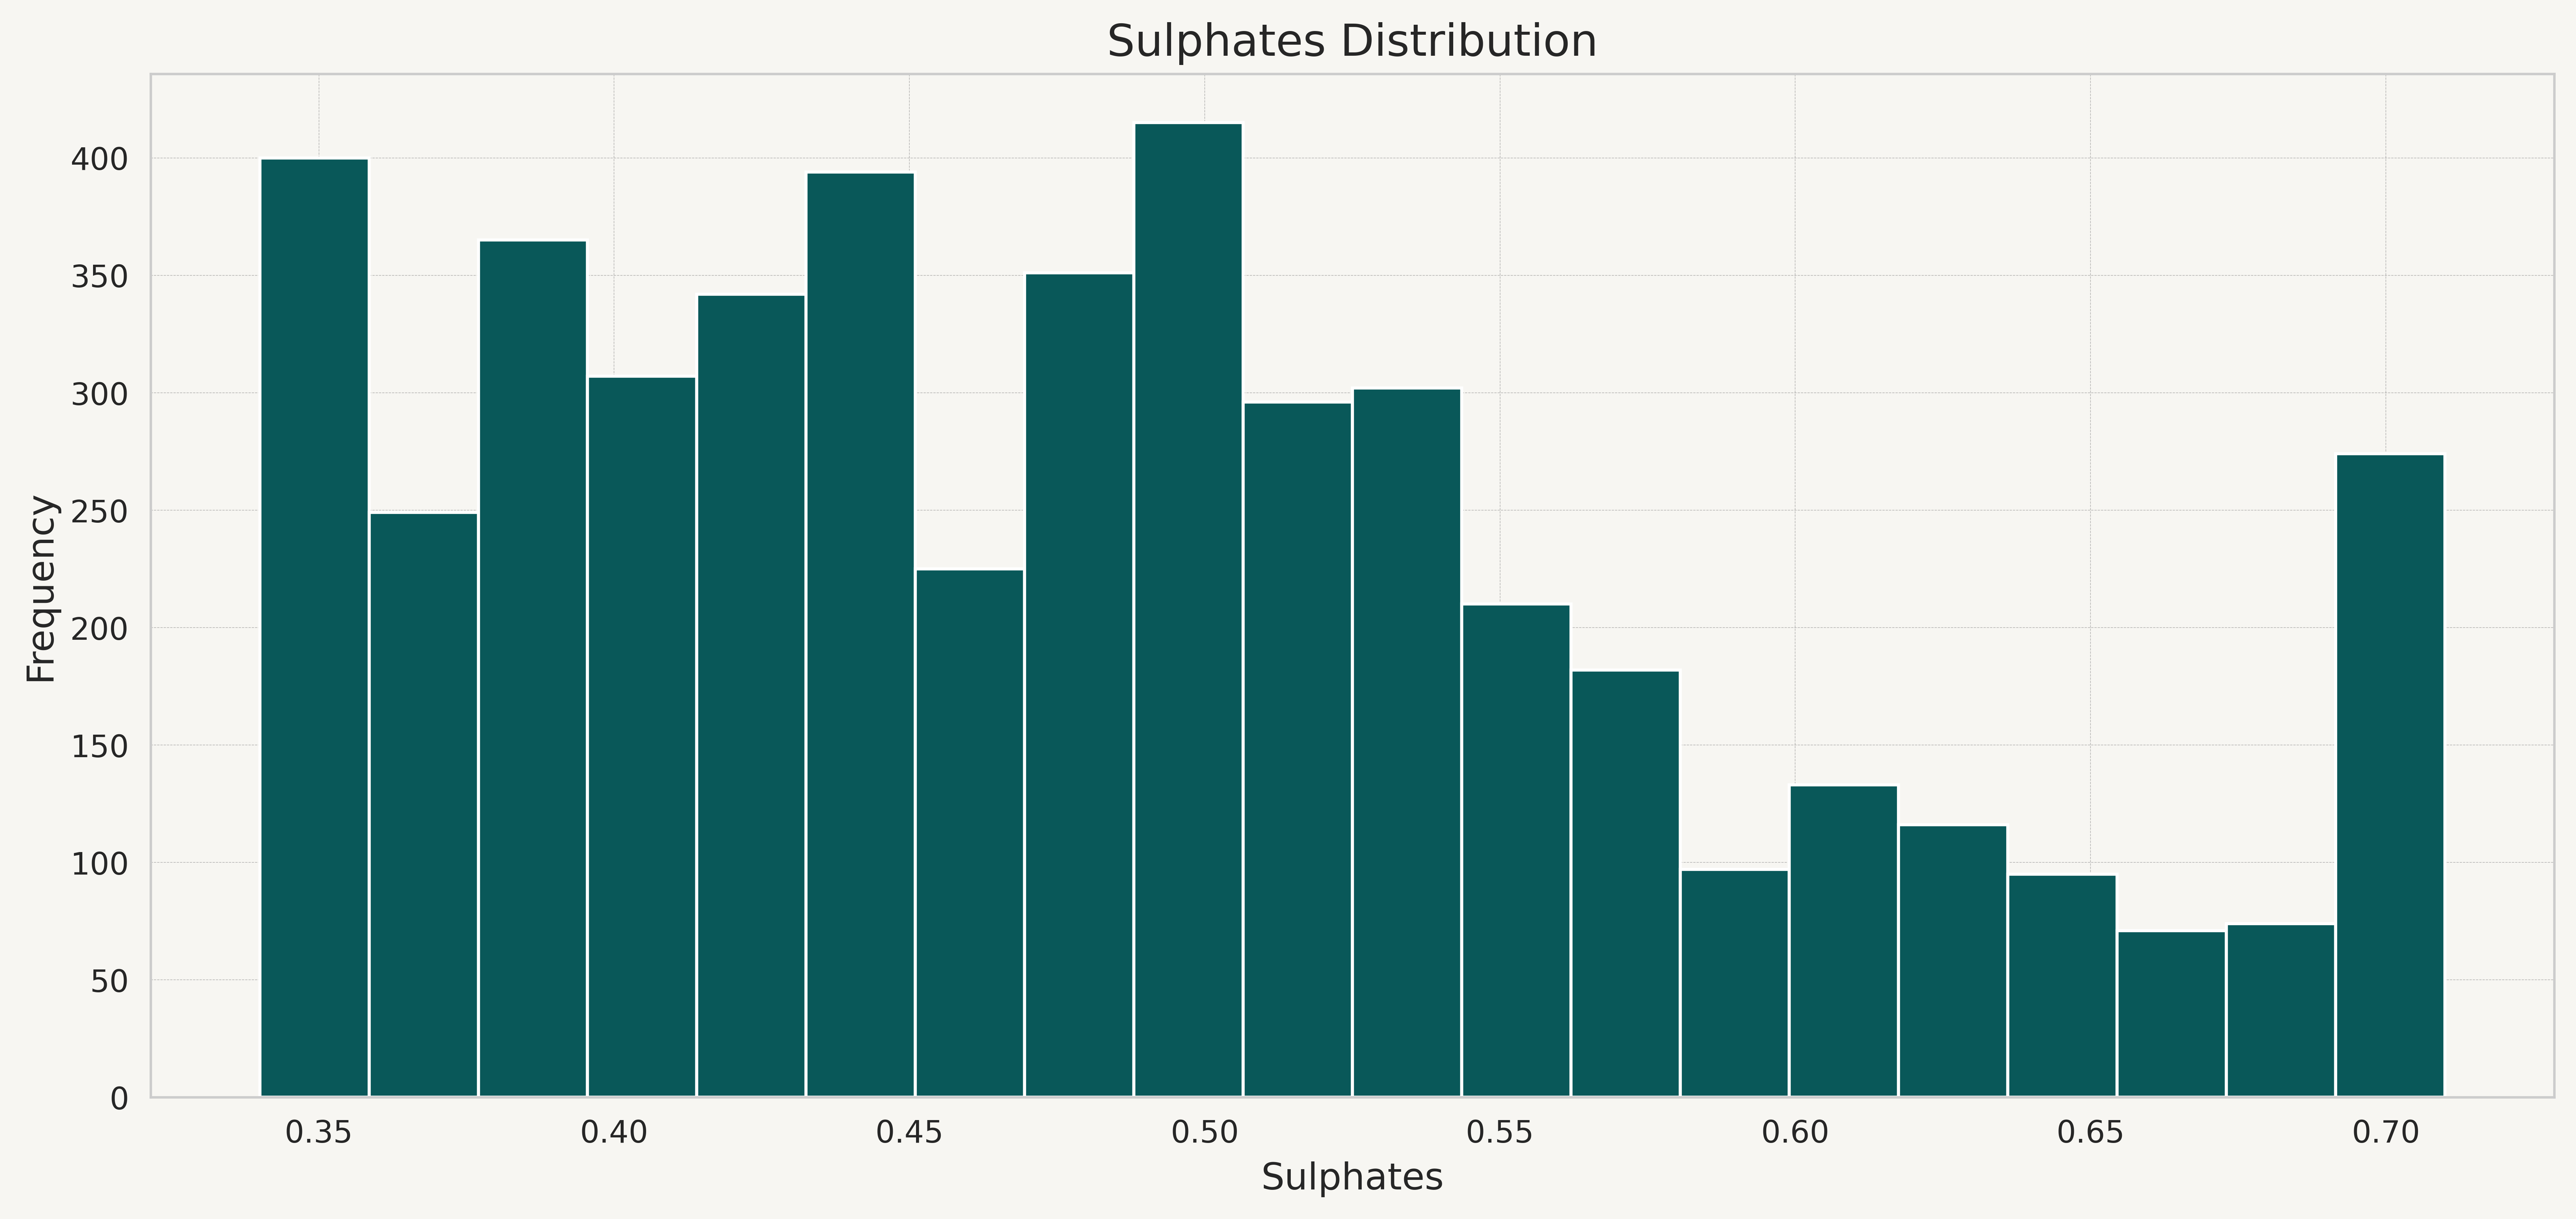

In [68]:
df['sulphates'].hist(bins=20)
plt.title('Sulphates Distribution')
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.show()

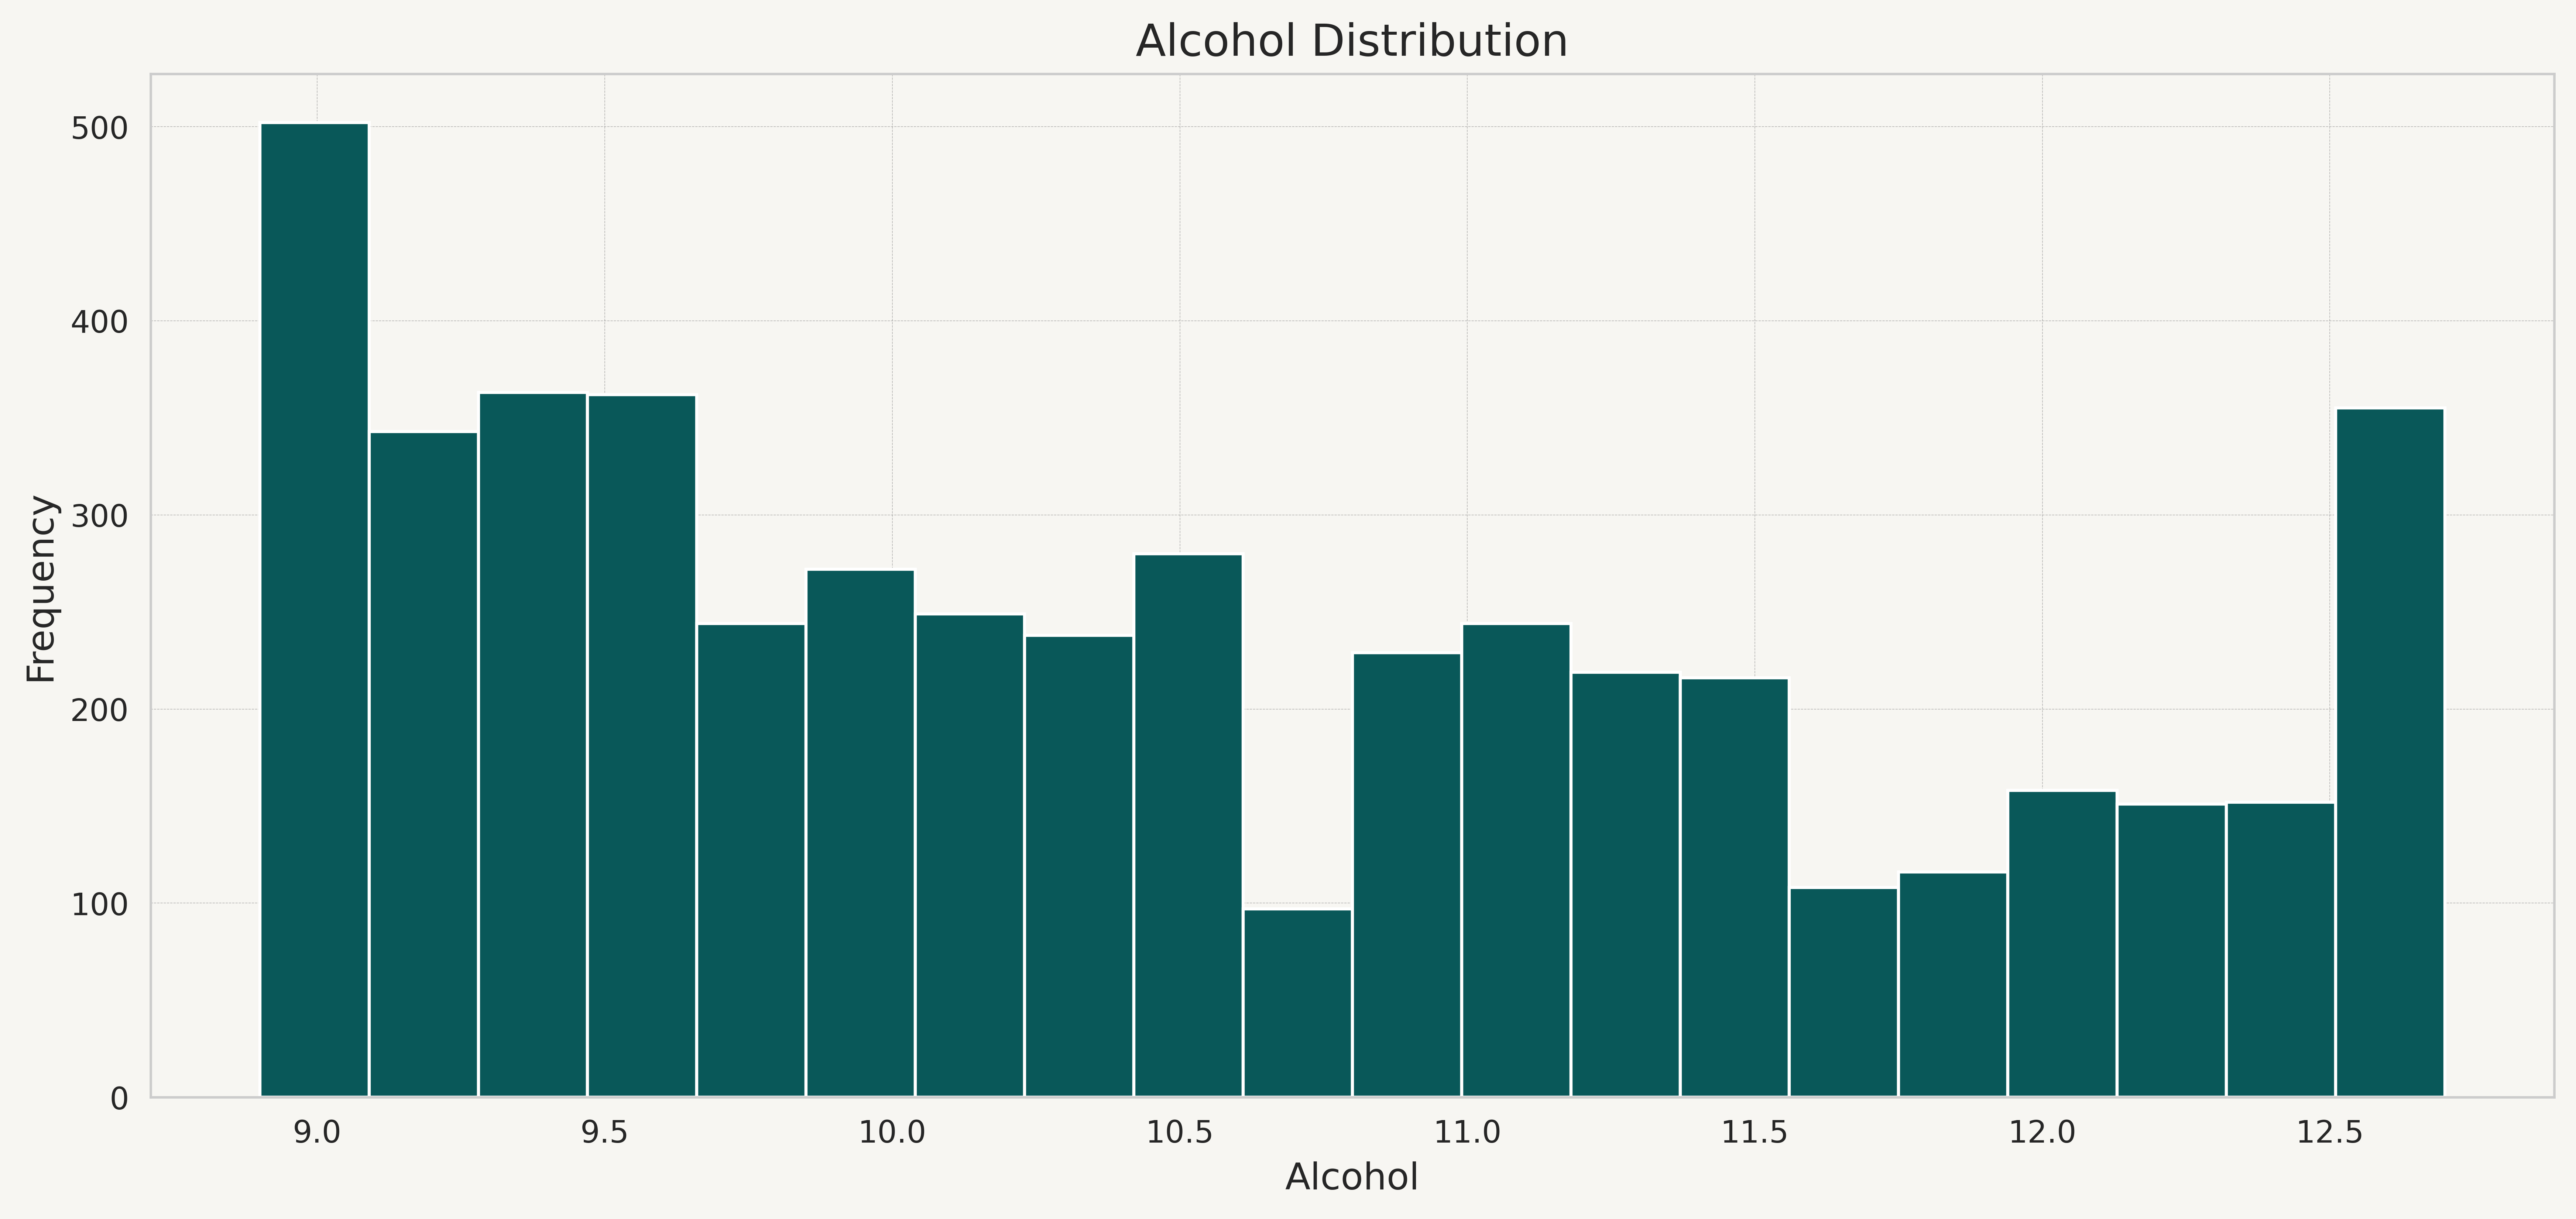

In [69]:
df['alcohol'].hist(bins=20)
plt.title('Alcohol Distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

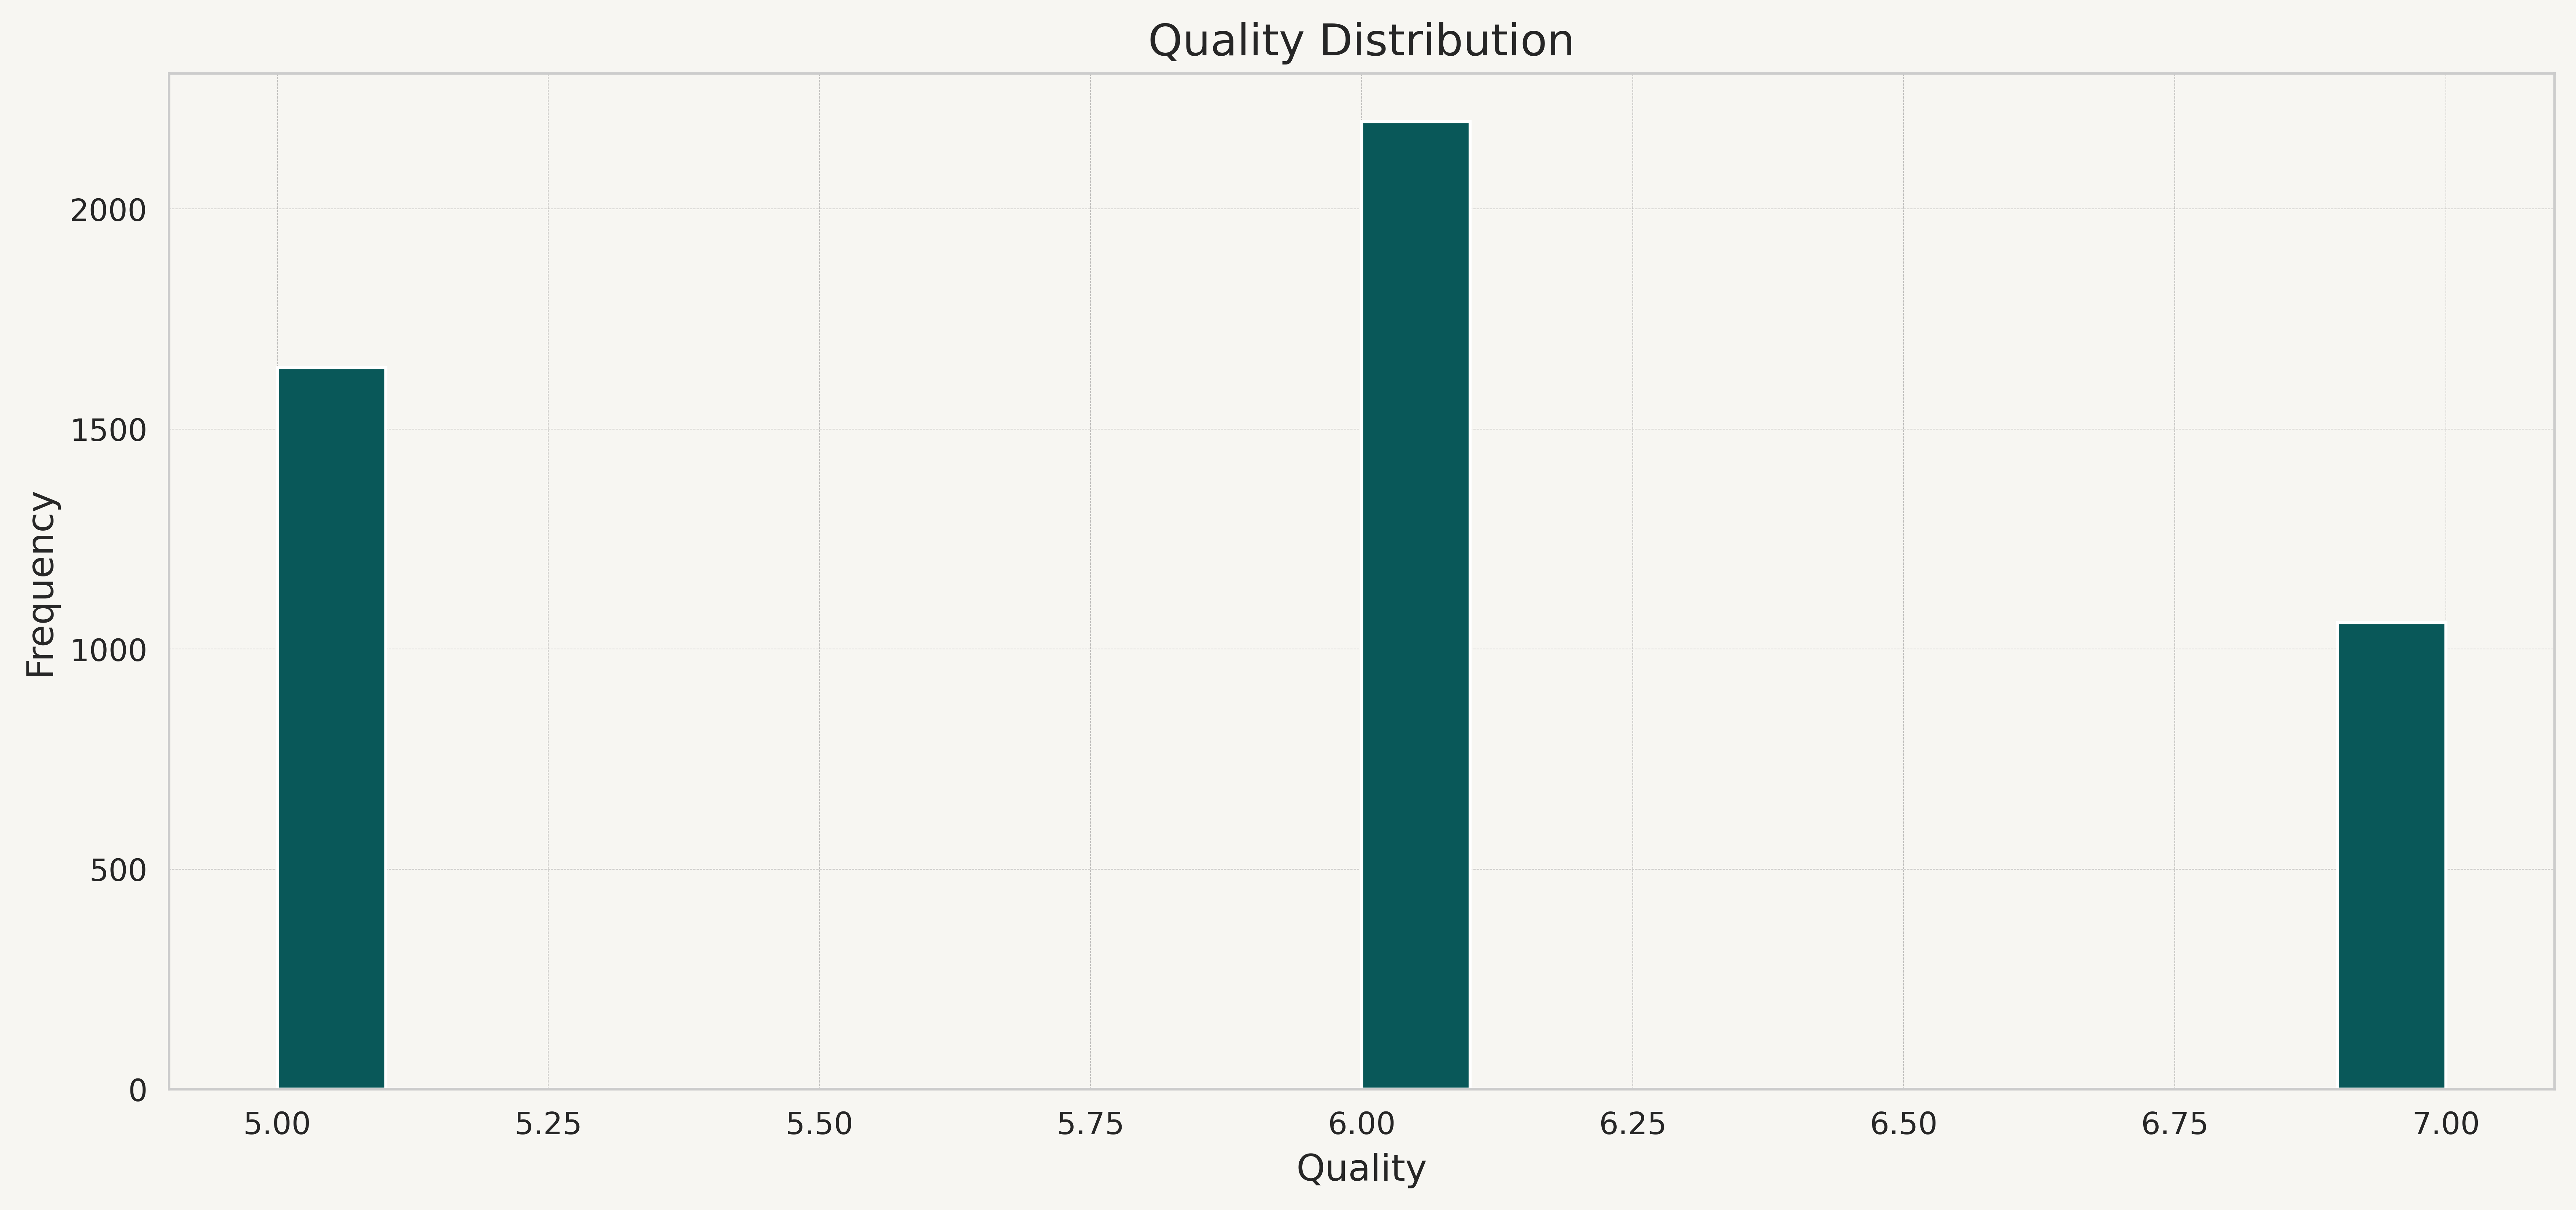

In [70]:
df['quality'].hist(bins=20)
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

## Outlier Detection

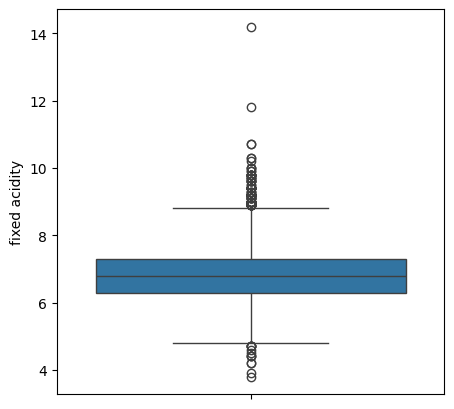

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(df['fixed acidity'])
plt.show()

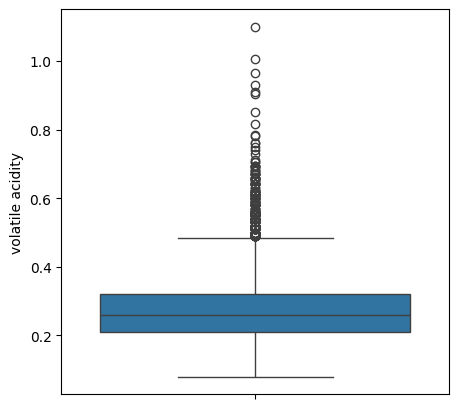

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(df['volatile acidity'])
plt.show()

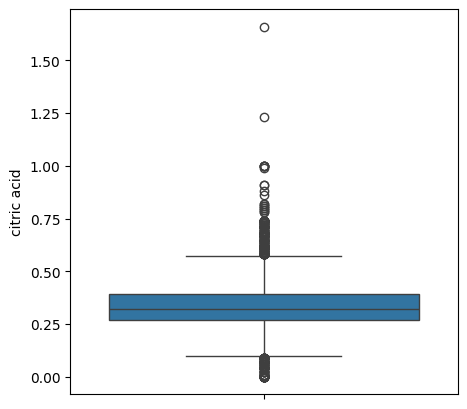

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(df['citric acid'])
plt.show()

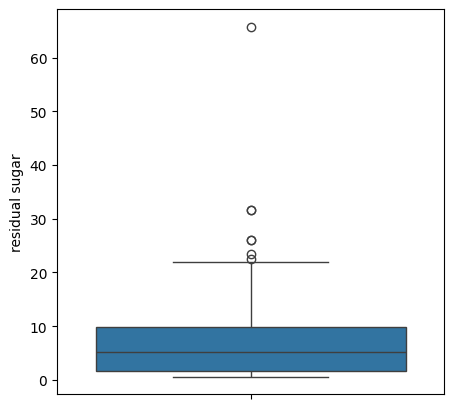

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(df['residual sugar'])
plt.show()

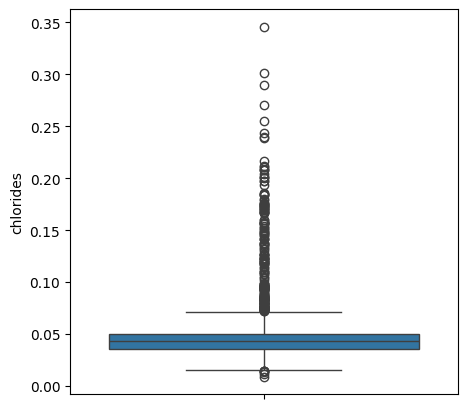

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(df['chlorides'])
plt.show()

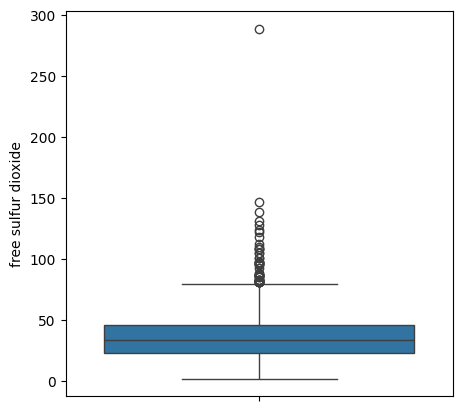

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(df['free sulfur dioxide'])
plt.show()

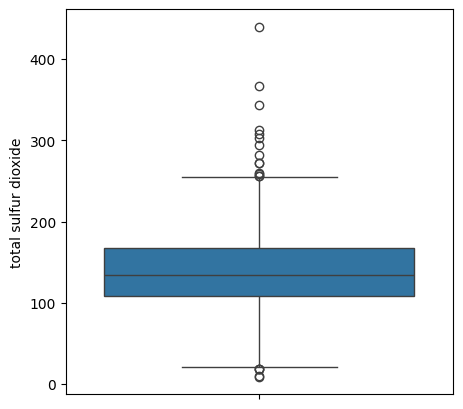

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(df['total sulfur dioxide'])
plt.show()

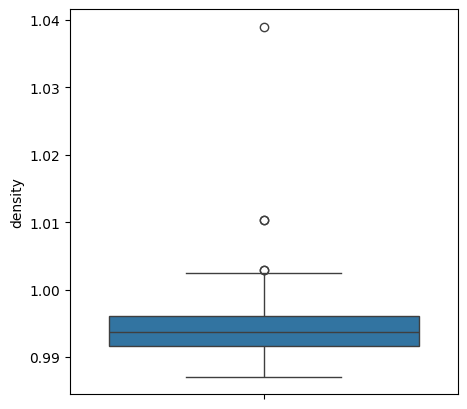

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(df['density'])
plt.show()

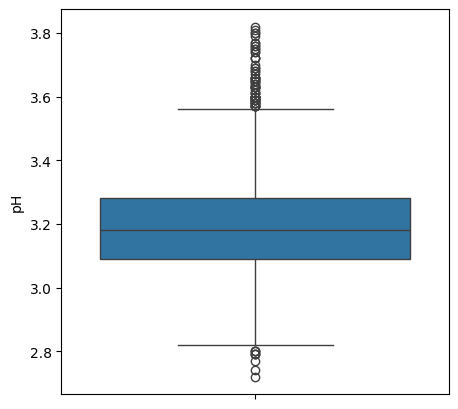

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(df['pH'])
plt.show()

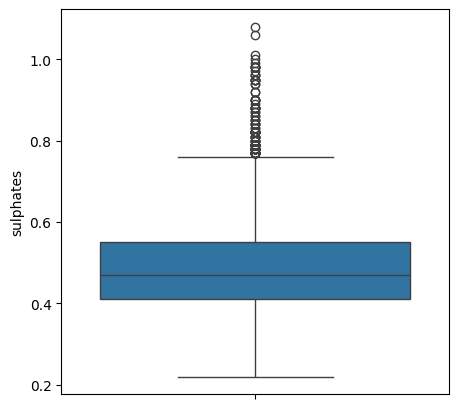

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(df['sulphates'])
plt.show()

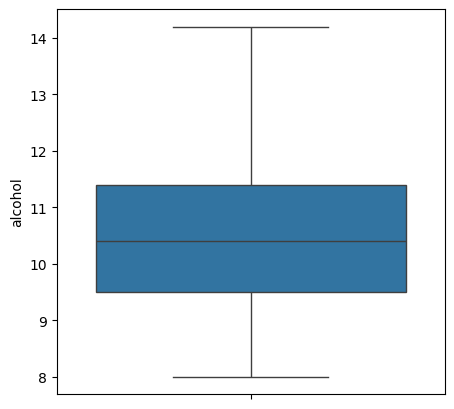

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(df['alcohol'])
plt.show()

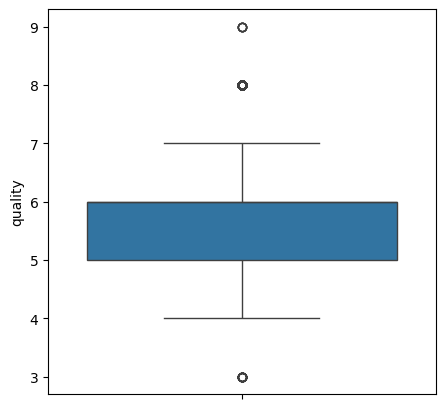

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(df['quality'])
plt.show()

In [22]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Outlier Detection and Imputation

In [23]:
def count_outliers_zscore(df, threshold=3):
    outlier_count = 0
    for column in df.select_dtypes(include=[np.number]):  # Only apply to numeric columns
        mean_col = df[column].mean()
        std_col = df[column].std()
        z_scores = (df[column] - mean_col) / std_col
        # Find data points where Z-score is greater than threshold
        outlier_count += (z_scores.abs() > threshold).sum()
    return outlier_count

  # Find outliers using Z-score
outlier_count = count_outliers_zscore(df)
print("Outliers detected using Z-score:")
print(outlier_count)



Outliers detected using Z-score:
475


In [24]:
def winsorized_data(df):
  for column in df.select_dtypes(include=[np.number]):
    df[column] = winsorize(df[column], limits=[0.05, 0.05])
  return df

Outlier Detection

In [25]:
winsorized_df = winsorized_data(df)
print(winsorized_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            15.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.6              0.29         0.30             1.1      0.027   
4897            6.0              0.21         0.38             1.1      0.027   

      free sulfur dioxide  

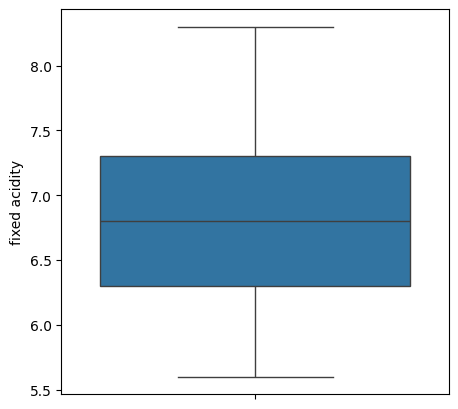

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(df['fixed acidity'])
plt.show()

#Machine Learning

##Train Test Split

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Y = df['quality']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7894)

In [30]:
scaler = StandardScaler().fit(X_train)
S_x = scaler.transform(X_train)
S_x_test = scaler.transform(X_test)

In [31]:
print(S_x_test)

[[-1.15993409 -0.28718861 -0.54723706 ...  1.80339172  1.6193386
   1.85575081]
 [-0.88518102 -0.65066604  1.65698143 ...  1.65616073 -1.27704063
   0.66779747]
 [-1.43468715  0.56092539  0.50239079 ...  1.72977622 -0.67778975
   1.09206652]
 ...
 [-0.33567489  1.04556197  1.97186978 ... -0.84676607 -0.87754005
  -0.94442493]
 [-1.70944022  0.56092539  1.23713028 ...  2.0242382   0.02133627
   0.83750509]
 [ 0.0764547  -1.01414347  0.18750243 ... -1.36207453  1.41958831
   0.1586746 ]]


Model Fitting

In [46]:
scaled_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [53]:
scaled_data_df = pd.DataFrame(S_x, columns=scaled_cols)
print(scaled_data_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -1.709440         -1.074723    -1.491902        0.171724   0.426726   
1          0.076455          1.651358    -0.022423        0.800160  -0.049467   
2         -1.572064         -0.105450    -0.547237        0.129828  -0.716136   
3         -1.022558         -0.650666     1.656981       -1.001357   0.712441   
4         -1.709440          1.106142    -1.701828        1.512389  -0.239944   
...             ...               ...          ...             ...        ...   
3913      -0.610428          1.166721     1.656981        1.470493   0.141010   
3914       0.076455         -0.287189    -0.652200        0.580208  -0.430421   
3915      -0.747804         -1.014143    -0.127386       -0.729035   0.236249   
3916      -0.885181         -0.892984    -0.757163        0.716369  -1.287567   
3917      -1.709440         -1.317041    -1.177014       -0.121546   0.331487   

      free sulfur dioxide  

# Our Model was bad

In [71]:
#Fitting the model to the data - Linear Regression doesnt work since our data is categorical
#lr = LinearRegression()
#lr.fit(scaled_data_df,y_train)

In [88]:
#Using new model for better results
svc = SVC(kernel='rbf')
svc.fit(scaled_data_df,y_train)

SVC()

In [89]:
y_pred = svc.predict(X_test)

In [82]:
#y_pred = lr.predict(X_test)

In [90]:
print(y_pred)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 



*   Error Analysis
*   Model Coefficients
*   Visualize (optional)
*   Residual Analysis



In [91]:
# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared =False)  # RMSE
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error (MAE): 0.5622448979591836
Mean Squared Error (MSE): 0.5622448979591836
Root Mean Squared Error (RMSE): 0.7498299126863263
R-squared (R²): -0.03386809269162194


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
# Create a DataFrame for better visualization
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(coef_df)

                      Coefficient
residual sugar           0.372251
alcohol                  0.146714
pH                       0.099973
fixed acidity            0.075046
sulphates                0.068734
free sulfur dioxide      0.054167
citric acid             -0.007534
total sulfur dioxide    -0.009036
chlorides               -0.028714
volatile acidity        -0.144255
density                 -0.460784


In [79]:
# Print the intercept value
intercept_value = lr.intercept_
print(f"Intercept (b0): {intercept_value:.3f}")


Intercept (b0): 5.886


Residual Analysis

In [80]:
# Calculate residuals
residuals = y_test - y_pred


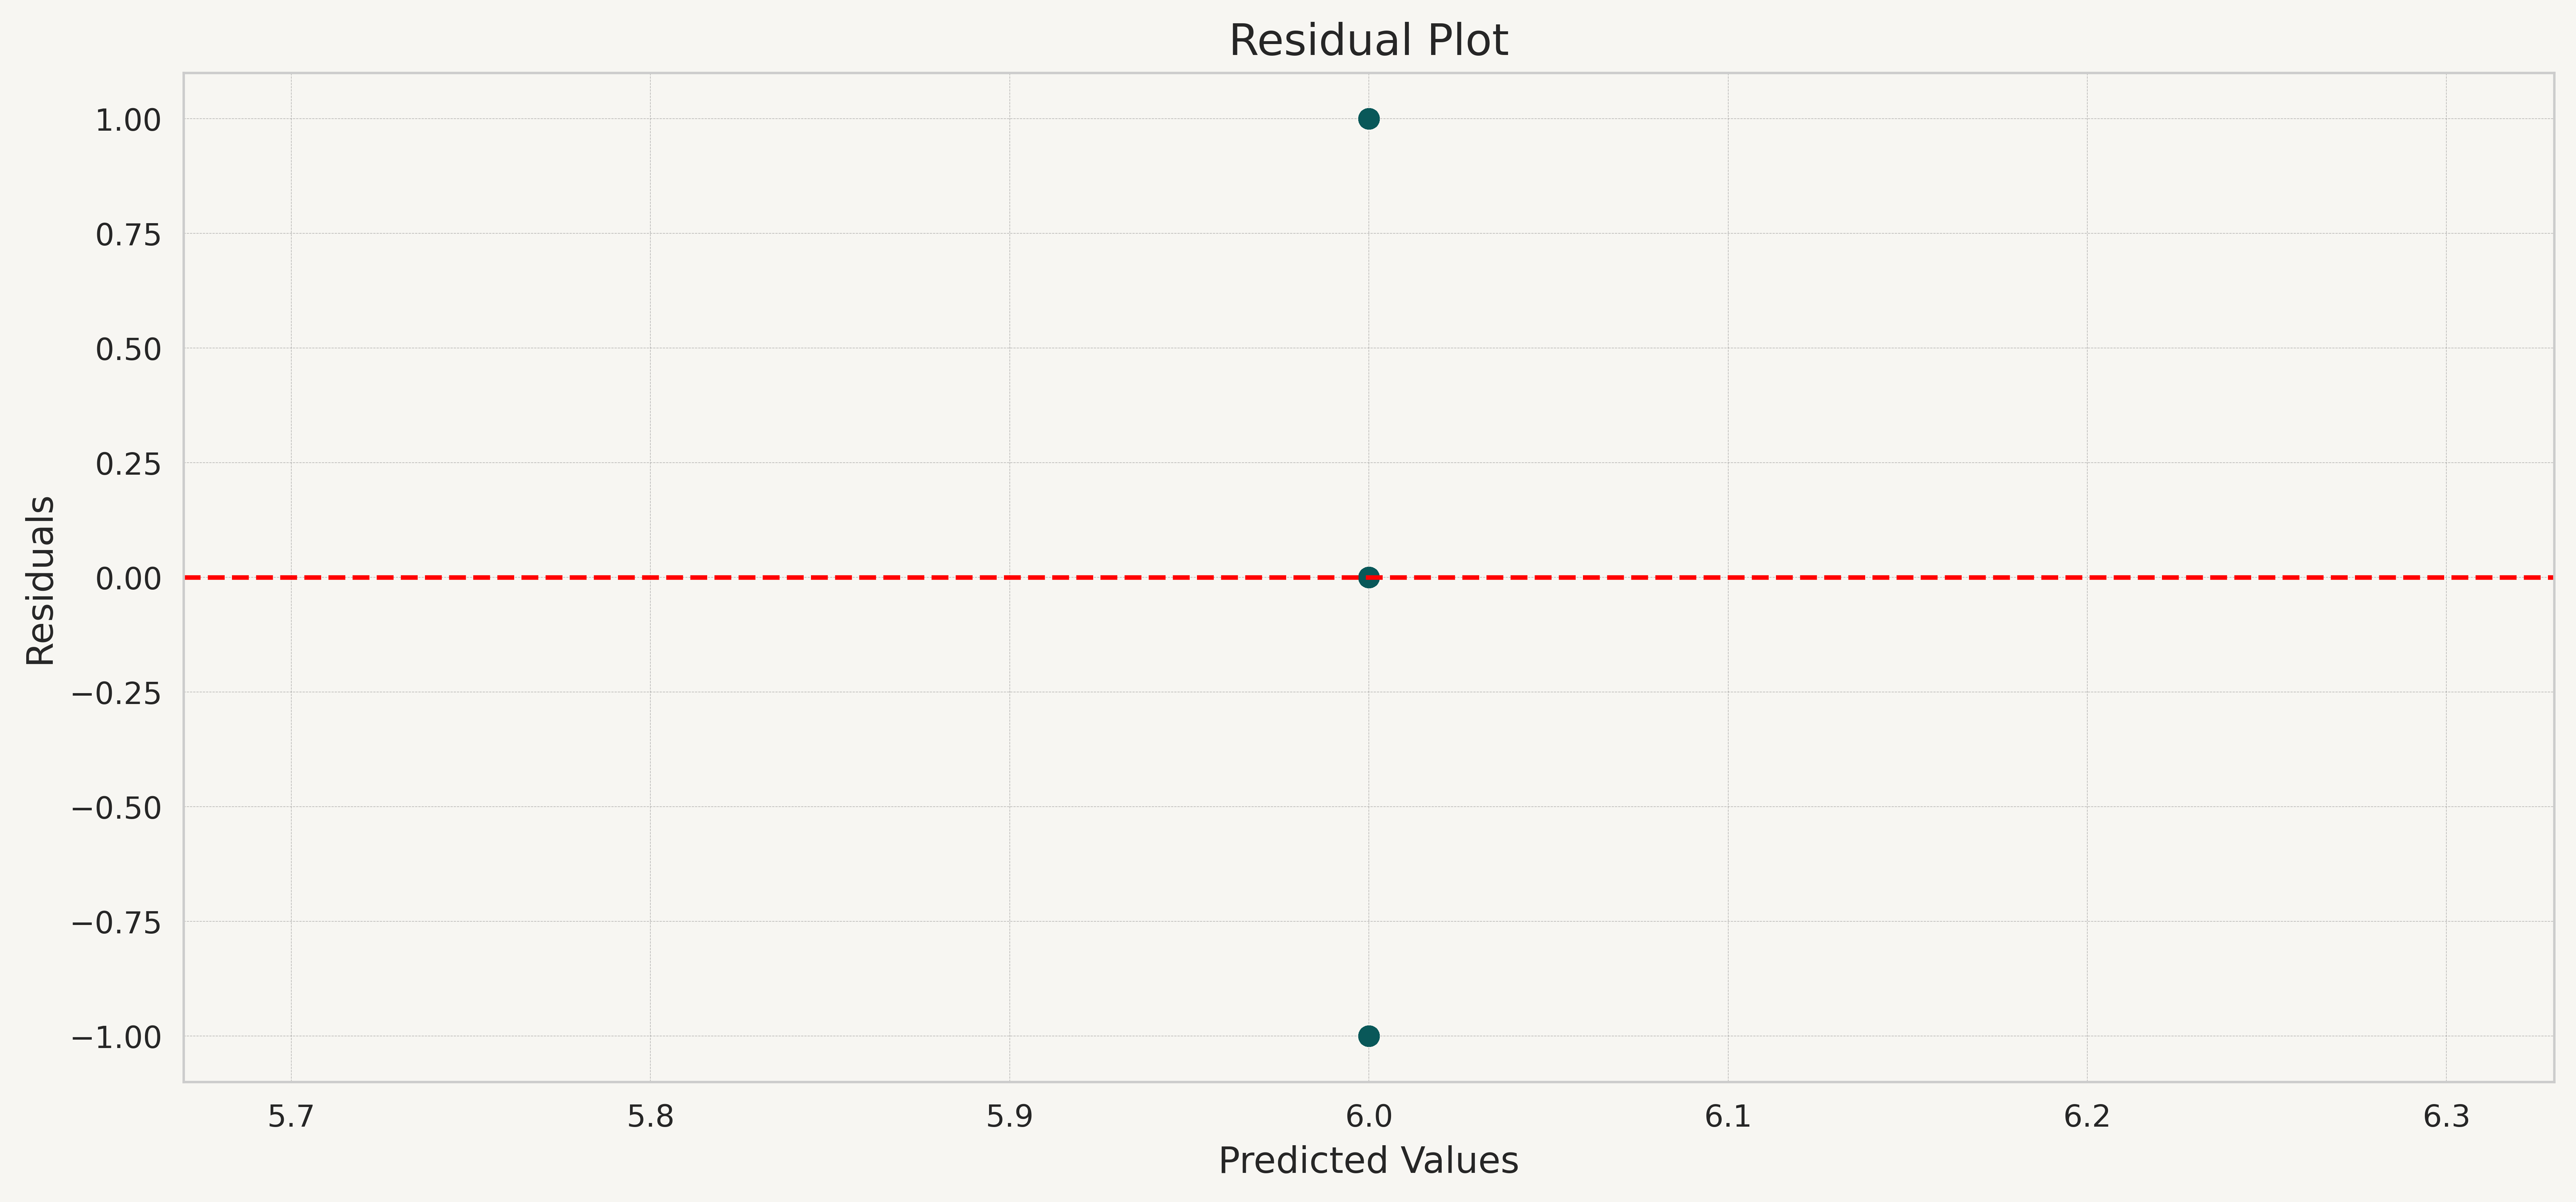

In [81]:
# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()